# Info
Purpose:

    MODACAERO project. To look at the results from the improved above cloud aod retrievals from MODIS during ORACLES
    Compares to 4STAR and HSRL over the same region as MODIS

Input:

    None

Output:

    Figure and save files

Keywords:

    none

Dependencies:

    - load_utils.py
    - matplotlib
    - numpy
    - write_utils
    - path_utils
    - hdf5storage
    - scipy

Needed Files:
  - MODACAERO updated retrieval files
  - 4STAR ORACLES netcdf
  - HSRL AOD retrievals for ORACLES

Modification History:

    Written: Samuel LeBlanc, Santa Cruz, CA, 2023-08-11
    Modified:


# Prepare python environment

In [1]:
import numpy as np
import load_utils as lu
import write_utils as wu
from path_utils import getpath
import hdf5storage as hs
import scipy.io as sio
import matplotlib.pyplot as plt
%matplotlib notebook
import os
import pandas as pd
from datetime import datetime, timedelta
import pickle

In [5]:
name = 'ACAERO'
vv = 'v1'
fp = getpath(name)


Return path named:  ACAERO /data2/ACAERO/


# Load files

## Load 4STAR ORACLES

In [18]:
fps = getpath('sunsat')

Created new path: /data/sunsat/ under the name: sunsat
Return path named:  sunsat /data/sunsat/


In [34]:
fpo = getpath('ORACLES')

Return path named:  ORACLES /data/sam/ORACLES/


### 2016

In [36]:
ar6 = hs.loadmat(fpo+'/aod_ict/R4/all_aod_ict_R4_2016.mat')

In [37]:
ar6['flac'] = (ar6['qual_flag']==0)&(ar6['flag_acaod']==1)
ar6['flacr'] = (ar6['qual_flag']==0)&(ar6['flag_acaod']==1)&(ar6['fl_routine'])
ar6['flaco'] = (ar6['qual_flag']==0)&(ar6['flag_acaod']==1)&~(ar6['fl_routine'])
ar6['flr'] = (ar6['qual_flag']==0) & (ar6['fl_routine'])
ar6['flo'] = (ar6['qual_flag']==0) & ~(ar6['fl_routine'])
ar6['fl'] = (ar6['qual_flag']==0)

### 2017

In [38]:
ar7 = hs.loadmat(fpo+'/aod_ict_2017/R1/all_aod_ict_R1_2017.mat')

In [39]:
ar7['flac'] = (ar7['qual_flag']==0)&(ar7['flag_acaod']==1)
ar7['flacr'] = (ar7['qual_flag']==0)&(ar7['flag_acaod']==1)&(ar7['fl_routine'])
ar7['flaco'] = (ar7['qual_flag']==0)&(ar7['flag_acaod']==1)&~(ar7['fl_routine'])
ar7['flr'] = (ar7['qual_flag']==0) & (ar7['fl_routine'])
ar7['flo'] = (ar7['qual_flag']==0) & ~(ar7['fl_routine'])
ar7['fl'] = (ar7['qual_flag']==0)

### 2018

In [40]:
ar8 = hs.loadmat(fpo+'/aod_ict_2018/{vv}/all_aod_ict_{vv}_2018.mat'.format(vv='R1'))

In [41]:
ar8['flac'] = (ar8['qual_flag']==0) & (ar8['flag_acaod']==1)  
ar8['flacr'] = (ar8['qual_flag']==0) & (ar8['flag_acaod']==1)&(ar8['fl_routine']) 
ar8['flaco'] = (ar8['qual_flag']==0) & (ar8['flag_acaod']==1)&~(ar8['fl_routine']) 
ar8['flr'] = (ar8['qual_flag']==0) & (ar8['fl_routine'])
ar8['flo'] = (ar8['qual_flag']==0) & (ar8['fl_routine']==False)
ar8['fl'] = (ar8['qual_flag']==0)

### Combined and set days

In [42]:
days6 = ['20160824','20160825','20160827','20160830','20160831','20160902','20160904','20160906','20160908',
       '20160910','20160912','20160914','20160918','20160920','20160924','20160925','20160927','20160930']
days7 = ['20170801','20170802','20170807','20170809', '20170812','20170813','20170815','20170817','20170818','20170819','20170821',
        '20170824','20170826','20170828','20170830','20170831','20170902','20170903','20170904']
days8 = ['20180921','20180922','20180924','20180927','20180930','20181002','20181003','20181005','20181007','20181010','20181012',
        '20181015','20181017','20181019','20181021','20181023','20181025','20181026','20181027']

In [43]:
ar6['daysd'] = [days6[i] for i in ar6['days'].astype(int)]
ar7['daysd'] = [days7[i] for i in ar7['days'].astype(int)]
ar8['daysd'] = [days8[i] for i in ar8['days'].astype(int)]

In [44]:
ar6['ndtime2'] = np.array([datetime(2018,int(d[4:6]),int(d[6:8]),int(ar6['Start_UTC'][i]),
                          int((ar6['Start_UTC'][i]-float(int(ar6['Start_UTC'][i])))*60)) for i,d in enumerate(ar6['daysd'])])
ar7['ndtime2'] = np.array([datetime(2018,int(d[4:6]),int(d[6:8]),int(ar7['Start_UTC'][i]),
                          int((ar7['Start_UTC'][i]-float(int(ar7['Start_UTC'][i])))*60)) for i,d in enumerate(ar7['daysd'])])
ar8['ndtime2'] = np.array([datetime(2018,int(d[4:6]),int(d[6:8]),int(ar8['Start_UTC'][i]),
                          int((ar8['Start_UTC'][i]-float(int(ar8['Start_UTC'][i])))*60)) for i,d in enumerate(ar8['daysd'])])

## Load HSRL ORACLES

### 2016

In [45]:
vv_2016 = 'R9'

In [46]:
fp6 = fpo+'data_other/HSRL/{vv}/'.format(vv=vv_2016)
f6_hsrl = os.listdir(fp6)
f6_hsrl = [ff for ff in f6_hsrl if (vv_2016 in ff) & ff.endswith('h5') ]
f6_hsrl.sort()
f6_hsrl

['HSRL2_ER2_20160819_R9.h5',
 'HSRL2_ER2_20160823_R9.h5',
 'HSRL2_ER2_20160912_R9.h5',
 'HSRL2_ER2_20160916_R9.h5',
 'HSRL2_ER2_20160918_R9.h5',
 'HSRL2_ER2_20160920_R9.h5',
 'HSRL2_ER2_20160922_R9.h5',
 'HSRL2_ER2_20160924_R9.h5']

In [59]:
s6 = {}
for i,f in enumerate(f6_hsrl):
    print('Reading file: '+fp6+f)
    hf = hs.h5py.File(fp6+f,'r+')
    h = {}
    h[u'lat'] = hf[u'Nav_Data']['Latitude'][:]
    h[u'lon'] = hf[u'Nav_Data']['Longitude'][:]
    h[u'alt'] = hf[u'Nav_Data']['gps_alt'][:]
    h[u'time'] = hf[u'Nav_Data']['gps_time'][:]
    h[u'header'] = hf['000_Readme'][:]
    h[u'acaod_355'] = hf['DataProducts']['355_AOT_above_cloud'][:]
    h[u'acaod_532'] = hf['DataProducts']['532_AOT_above_cloud'][:]
    h[u'acaod_355_unc'] = hf['DataUncertainty']['355_AOT_above_cloud_unc'][:]
    h[u'acaod_532_unc'] = hf['DataUncertainty']['532_AOT_above_cloud_unc'][:]
    h[u'cloud_top_height'] = hf['DataProducts']['cloud_top_height'][:]
    h[u'date'] = hf['header']['date'][:][0][0]
    h[u'filename'] = f
    alt = hf['DataProducts']['Altitude'][:][0,:]
    bsc_cl = hf['DataProducts']['532_bsc_cloud_screened'][:]
    h[u'aero_bot_height'] = np.array([alt[bks>0.00025][0] if (any(bks) & any(bks>0.00025)) else np.nan for bks in bsc_cl])
    h[u'aero_bot_height'][h[u'aero_bot_height']<200.0] = np.nan 
    h[u'aero_bot_height'][h[u'aero_bot_height']>7000.0] = np.nan 
    h[u'gap_dist'] = h[u'aero_bot_height'] - h[u'cloud_top_height'][:,0]
    s6[u's{:08.0f}'.format(h['date'])] = h

Reading file: /data/sam/ORACLES/data_other/HSRL/R9/HSRL2_ER2_20160819_R9.h5
Reading file: /data/sam/ORACLES/data_other/HSRL/R9/HSRL2_ER2_20160823_R9.h5
Reading file: /data/sam/ORACLES/data_other/HSRL/R9/HSRL2_ER2_20160912_R9.h5
Reading file: /data/sam/ORACLES/data_other/HSRL/R9/HSRL2_ER2_20160916_R9.h5
Reading file: /data/sam/ORACLES/data_other/HSRL/R9/HSRL2_ER2_20160918_R9.h5
Reading file: /data/sam/ORACLES/data_other/HSRL/R9/HSRL2_ER2_20160920_R9.h5
Reading file: /data/sam/ORACLES/data_other/HSRL/R9/HSRL2_ER2_20160922_R9.h5
Reading file: /data/sam/ORACLES/data_other/HSRL/R9/HSRL2_ER2_20160924_R9.h5


In [60]:
s6.keys()

dict_keys(['s20160819', 's20160823', 's20160912', 's20160916', 's20160918', 's20160920', 's20160922', 's20160924'])

In [70]:
# combine into one array
hr6 = {}
k6 = s6.keys()
for n in s6[list(k6)[0]].keys():
    try:
        hr6[n] = np.array([],dtype=s6[list(k6)[0]][n].dtype)
    except:
        hr6[n] = np.array([])

In [73]:
for i,d in enumerate(s6.keys()):
    hr6['date'] = np.append(hr6['date'],np.zeros_like(s6[d]['time'][:-1])+s6[d]['date'])
    print( len(np.zeros_like(s6[d]['time'])+s6[d]['date']),len(s6[d]['lat']))
    for n in s6[list(k6)[0]].keys():
        hr6[n] = np.append(hr6[n],s6[d][n])

1404 1404
1651 1651
2393 2393
2552 2552
2856 2856
2479 2479
2529 2529
2670 2670


In [74]:
hr6.keys() 

dict_keys(['lat', 'lon', 'alt', 'time', 'header', 'acaod_355', 'acaod_532', 'acaod_355_unc', 'acaod_532_unc', 'cloud_top_height', 'date', 'filename', 'aero_bot_height', 'gap_dist'])

### 2017

In [62]:
vv_2017 = 'R1'
fp7 = fpo+'data_other_2017/HSRL/'
f7_hsrl = os.listdir(fp7)
f7_hsrl = [ff for ff in f7_hsrl if ff.endswith('h5') ]
f7_hsrl.sort()
f7_hsrl

['HSRL2_P3_20170801_R1.h5',
 'HSRL2_P3_20170807_R1.h5',
 'HSRL2_P3_20170809_R1.h5',
 'HSRL2_P3_20170812_R1.h5',
 'HSRL2_P3_20170813_R1.h5',
 'HSRL2_P3_20170815_R1.h5',
 'HSRL2_P3_20170817_R1.h5',
 'HSRL2_P3_20170818_R1.h5',
 'HSRL2_P3_20170821_R1.h5',
 'HSRL2_P3_20170824_R1.h5',
 'HSRL2_P3_20170826_R1.h5',
 'HSRL2_P3_20170828_R1.h5',
 'HSRL2_P3_20170902_R1.h5',
 'HSRL2_P3_20170903_R1.h5',
 'HSRL2_P3_20170904_R1.h5']

In [63]:
s7 = {}
for i,f in enumerate(f7_hsrl):
    print('Reading file: '+fp7+f)
    hf = hs.h5py.File(fp7+f,'r+')
    h = {}
    h[u'header'] = hf['000_Readme'][:]
    h[u'acaod_355'] = hf['DataProducts']['355_AOT_above_cloud'][:]
    h[u'acaod_532'] = hf['DataProducts']['532_AOT_above_cloud'][:]
  #  h[u'acaod_355_unc'] = hf['DataUncertainty']['355_AOT_above_cloud_unc'][:]
  #  h[u'acaod_532_unc'] = hf['DataUncertainty']['532_AOT_above_cloud_unc'][:]
    h[u'cloud_top_height'] = hf['DataProducts']['cloud_top_height'][:]
    h[u'date'] = hf['header']['date'][:][0][0]
    h[u'filename'] = f
    try:
        h[u'lat'] = hf['Nav_Data']['gps_lat'][:]
        h[u'lon'] = hf['Nav_Data']['gps_lon'][:]
        h[u'alt'] = hf['Nav_Data']['gps_alt'][:]
        h[u'time'] = hf['Nav_Data']['gps_time'][:]
    except:
        h[u'lat'] = hf['ApplanixIMU']['gps_lat'][:]
        h[u'lon'] = hf['ApplanixIMU']['gps_lon'][:]
        h[u'alt'] = hf['ApplanixIMU']['gps_alt'][:]
        h[u'time'] = hf['ApplanixIMU']['gps_time'][:]
    h[u'fl'] = h['alt']>5000.0
    alt = hf['DataProducts']['Altitude'][:][0,:]
    bsc_cl = hf['DataProducts']['532_bsc_cloud_screened'][:]
    h[u'aero_bot_height'] = np.array([alt[bks>0.00025][0] if (any(bks) & any(bks>0.00025)) else np.nan for bks in bsc_cl])
    h[u'aero_bot_height'][h[u'aero_bot_height']<200.0] = np.nan 
    h[u'aero_bot_height'][h[u'aero_bot_height']>7000.0] = np.nan 
    h[u'gap_dist'] = h[u'aero_bot_height'] - h[u'cloud_top_height'][:,0]
    s7[u's{:08.0f}'.format(h['date'])] = h

Reading file: /data/sam/ORACLES/data_other_2017/HSRL/HSRL2_P3_20170801_R1.h5
Reading file: /data/sam/ORACLES/data_other_2017/HSRL/HSRL2_P3_20170807_R1.h5
Reading file: /data/sam/ORACLES/data_other_2017/HSRL/HSRL2_P3_20170809_R1.h5
Reading file: /data/sam/ORACLES/data_other_2017/HSRL/HSRL2_P3_20170812_R1.h5
Reading file: /data/sam/ORACLES/data_other_2017/HSRL/HSRL2_P3_20170813_R1.h5
Reading file: /data/sam/ORACLES/data_other_2017/HSRL/HSRL2_P3_20170815_R1.h5
Reading file: /data/sam/ORACLES/data_other_2017/HSRL/HSRL2_P3_20170817_R1.h5
Reading file: /data/sam/ORACLES/data_other_2017/HSRL/HSRL2_P3_20170818_R1.h5
Reading file: /data/sam/ORACLES/data_other_2017/HSRL/HSRL2_P3_20170821_R1.h5
Reading file: /data/sam/ORACLES/data_other_2017/HSRL/HSRL2_P3_20170824_R1.h5
Reading file: /data/sam/ORACLES/data_other_2017/HSRL/HSRL2_P3_20170826_R1.h5
Reading file: /data/sam/ORACLES/data_other_2017/HSRL/HSRL2_P3_20170828_R1.h5
Reading file: /data/sam/ORACLES/data_other_2017/HSRL/HSRL2_P3_20170902_R1.h5

In [75]:
hr7 = {}
k7 = s7.keys()
for n in s7[list(k7)[0]].keys():
    try:
        hr7[n] = np.array([],dtype=s7[list(k7)[0]][n].dtype)    
    except:
        hr7[n] = np.array([])

In [76]:
for i,d in enumerate(s7.keys()):
    hr7['date'] = np.append(hr7['date'],np.zeros_like(s7[d]['time'][:-1])+s7[d]['date'])
    print( len(np.zeros_like(s7[d]['time'])+s7[d]['date']),len(s7[d]['lat']))
    for n in s7[list(k7)[0]].keys():
        hr7[n] = np.append(hr7[n],s7[d][n])

1997 1997
3446 3446
2665 2665
2918 2918
3195 3195
3168 3168
2919 2919
1856 1856
2775 2775
3175 3175
3314 3314
2744 2744
2867 2867
3273 3273
1755 1755


In [77]:
hr7.keys()

dict_keys(['header', 'acaod_355', 'acaod_532', 'cloud_top_height', 'date', 'filename', 'lat', 'lon', 'alt', 'time', 'fl', 'aero_bot_height', 'gap_dist'])

### 2018

In [64]:
vv_2018 = 'R2'
fp8 = fpo+'data_other_2018/HSRL/'
f8_hsrl = []
for f8l in os.listdir(fp8):
    if f8l.endswith('.h5') and vv_2018 in f8l:
        f8_hsrl.append(f8l)
f8_hsrl.sort()
f8_hsrl

['HSRL2_P3_20180921_R2.h5',
 'HSRL2_P3_20180922_R2.h5',
 'HSRL2_P3_20180924_R2.h5',
 'HSRL2_P3_20180927_R2.h5',
 'HSRL2_P3_20180930_R2.h5',
 'HSRL2_P3_20181002_R2.h5',
 'HSRL2_P3_20181003_R2.h5',
 'HSRL2_P3_20181005_R2.h5',
 'HSRL2_P3_20181007_R2.h5',
 'HSRL2_P3_20181010_R2.h5',
 'HSRL2_P3_20181012_R2.h5',
 'HSRL2_P3_20181015_R2.h5',
 'HSRL2_P3_20181017_R2.h5',
 'HSRL2_P3_20181019_R2.h5',
 'HSRL2_P3_20181021_R2.h5',
 'HSRL2_P3_20181023_R2.h5',
 'HSRL2_P3_20181025_R2.h5',
 'HSRL2_P3_20181026_R2.h5',
 'HSRL2_P3_20181027_R2.h5']

In [65]:
s8 = {}
for i,f in enumerate(f8_hsrl):
    print( 'Reading file: '+fp8+f)
    hf = hs.h5py.File(fp8+f,'r+') 
    h = {}
    h[u'header'] = hf['000_Readme'][:]
    h[u'acaod_355'] = hf['DataProducts']['355_AOT_above_cloud'][:]
    h[u'acaod_532'] = hf['DataProducts']['532_AOT_above_cloud'][:]
  #  h[u'acaod_355_unc'] = hf['DataUncertainty']['355_AOT_above_cloud_unc'][:]
  #  h[u'acaod_532_unc'] = hf['DataUncertainty']['532_AOT_above_cloud_unc'][:]
    h[u'cloud_top_height'] = hf['DataProducts']['cloud_top_height'][:]
    h[u'date'] = hf['header']['date'][:][0][0]
    h[u'filename'] = f
    try:
        h[u'lat'] = hf['Nav_Data']['gps_lat'][:]
        h[u'lon'] = hf['Nav_Data']['gps_lon'][:]
        h[u'alt'] = hf['Nav_Data']['gps_alt'][:]
        h[u'time'] = hf['Nav_Data']['gps_time'][:]
    except:
        h[u'lat'] = hf['ApplanixIMU']['gps_lat'][:]
        h[u'lon'] = hf['ApplanixIMU']['gps_lon'][:]
        h[u'alt'] = hf['ApplanixIMU']['gps_alt'][:]
        h[u'time'] = hf['ApplanixIMU']['gps_time'][:]
    h[u'fl'] = h['alt'] >5000.0
    s8[u's{:08.0f}'.format(h['date'])] = h

Reading file: /data/sam/ORACLES/data_other_2018/HSRL/HSRL2_P3_20180921_R2.h5
Reading file: /data/sam/ORACLES/data_other_2018/HSRL/HSRL2_P3_20180922_R2.h5
Reading file: /data/sam/ORACLES/data_other_2018/HSRL/HSRL2_P3_20180924_R2.h5
Reading file: /data/sam/ORACLES/data_other_2018/HSRL/HSRL2_P3_20180927_R2.h5
Reading file: /data/sam/ORACLES/data_other_2018/HSRL/HSRL2_P3_20180930_R2.h5
Reading file: /data/sam/ORACLES/data_other_2018/HSRL/HSRL2_P3_20181002_R2.h5
Reading file: /data/sam/ORACLES/data_other_2018/HSRL/HSRL2_P3_20181003_R2.h5
Reading file: /data/sam/ORACLES/data_other_2018/HSRL/HSRL2_P3_20181005_R2.h5
Reading file: /data/sam/ORACLES/data_other_2018/HSRL/HSRL2_P3_20181007_R2.h5
Reading file: /data/sam/ORACLES/data_other_2018/HSRL/HSRL2_P3_20181010_R2.h5
Reading file: /data/sam/ORACLES/data_other_2018/HSRL/HSRL2_P3_20181012_R2.h5
Reading file: /data/sam/ORACLES/data_other_2018/HSRL/HSRL2_P3_20181015_R2.h5
Reading file: /data/sam/ORACLES/data_other_2018/HSRL/HSRL2_P3_20181017_R2.h5

In [78]:
hr8 = {}
k8 = list(s8.keys())
for n in s8[k8[0]].keys():
    try:
        hr8[n] = np.array([],dtype=s8[k8[0]][n].dtype)
    except:
        hr8[n] = np.array([])

In [79]:
for i,d in enumerate(s8.keys()):
    hr8['date'] = np.append(hr8['date'],np.zeros_like(s8[d]['time'][:-1])+s8[d]['date'])
    for n in s8[k8[0]].keys():
        hr8[n] = np.append(hr8[n],s8[d][n])

In [80]:
hr8.keys()

dict_keys(['header', 'acaod_355', 'acaod_532', 'cloud_top_height', 'date', 'filename', 'lat', 'lon', 'alt', 'time', 'fl'])

## Load the AQUA

In [6]:
fpa = fp+'AQUA'

In [10]:
files_a = os.listdir(fpa)
files_a.sort()

In [11]:
len(files_a)

1715

## Load the VIIRS

# Plot out the comparisons

## Get the overlaps and matches

### For  4STAR

### For HSRL

<IPython.core.display.Javascript object>


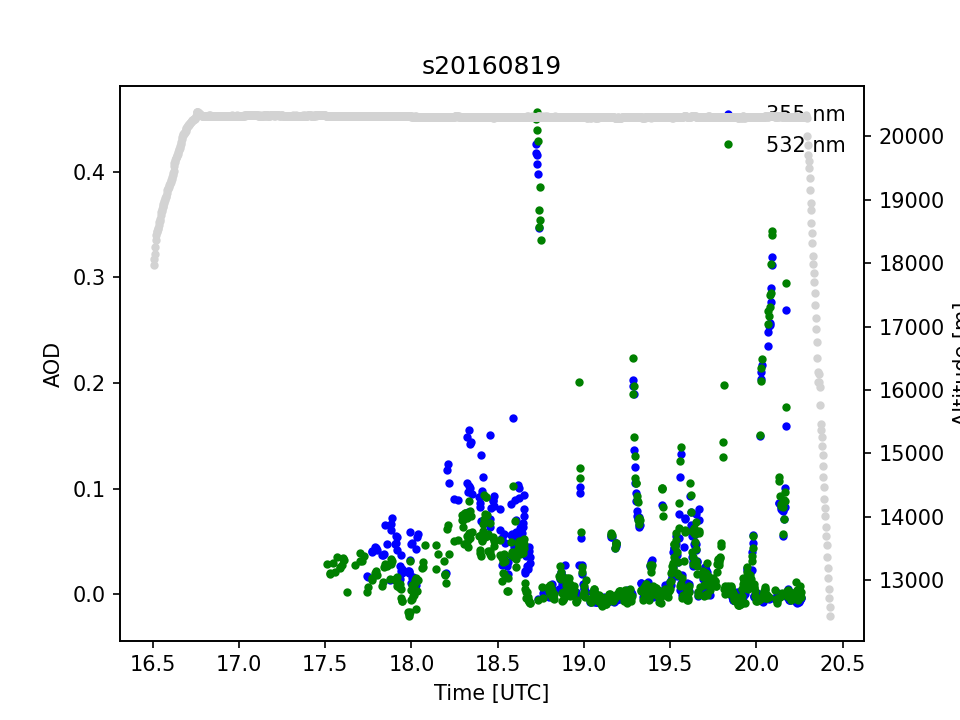

<IPython.core.display.Javascript object>


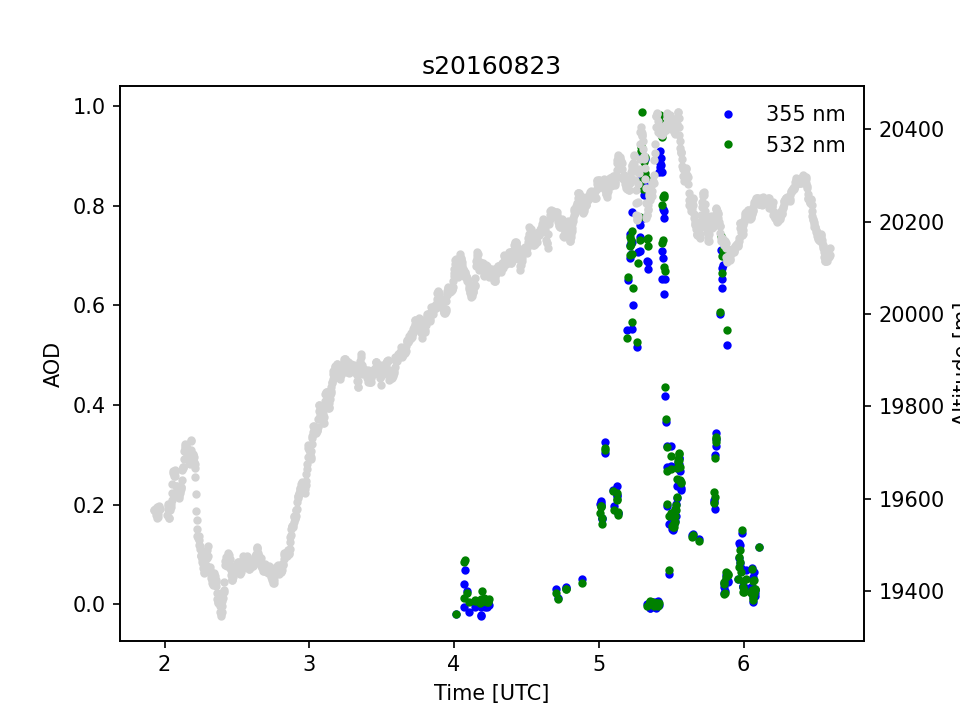

<IPython.core.display.Javascript object>


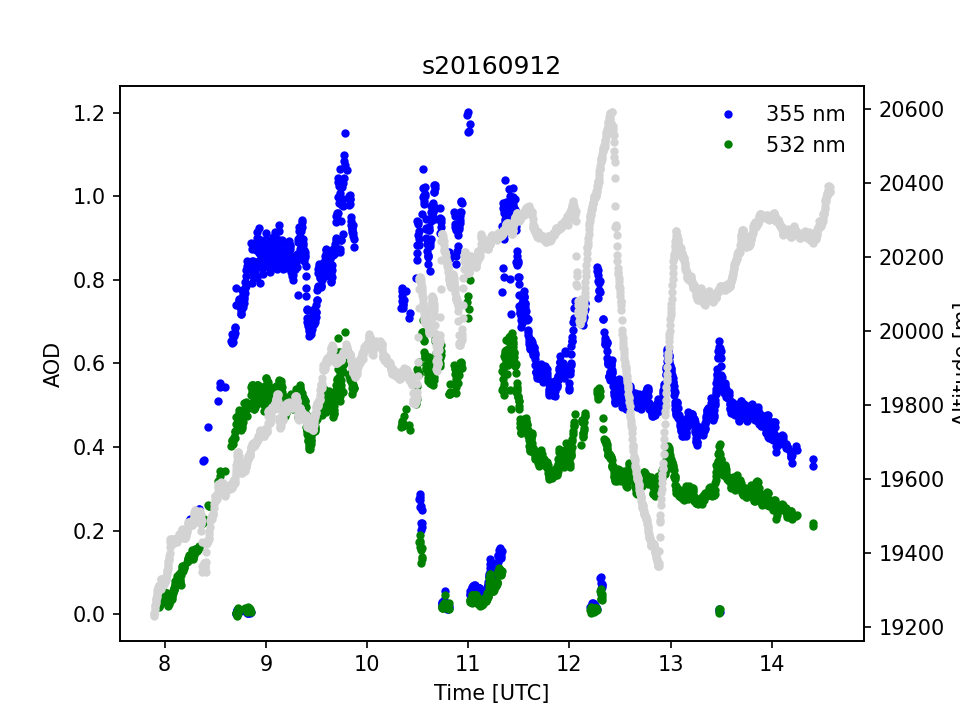

<IPython.core.display.Javascript object>


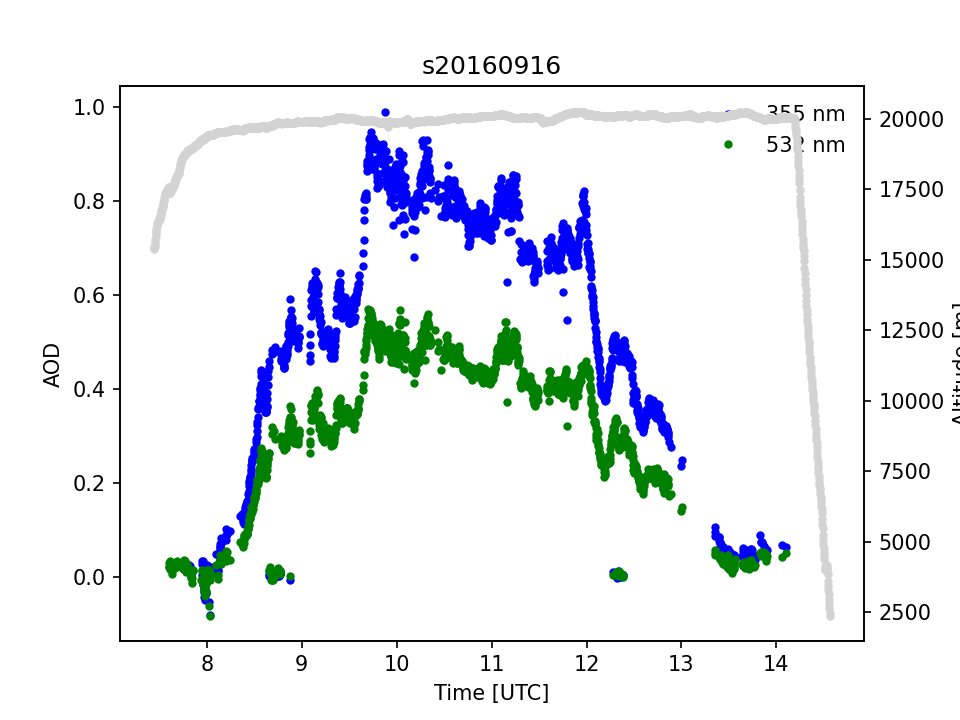

<IPython.core.display.Javascript object>


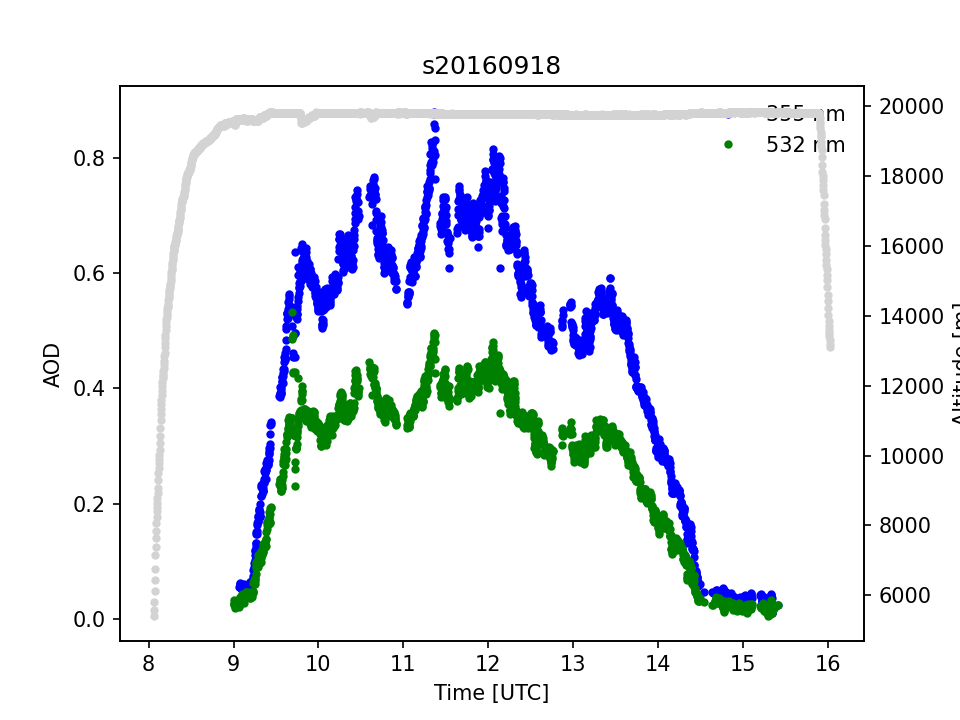

<IPython.core.display.Javascript object>


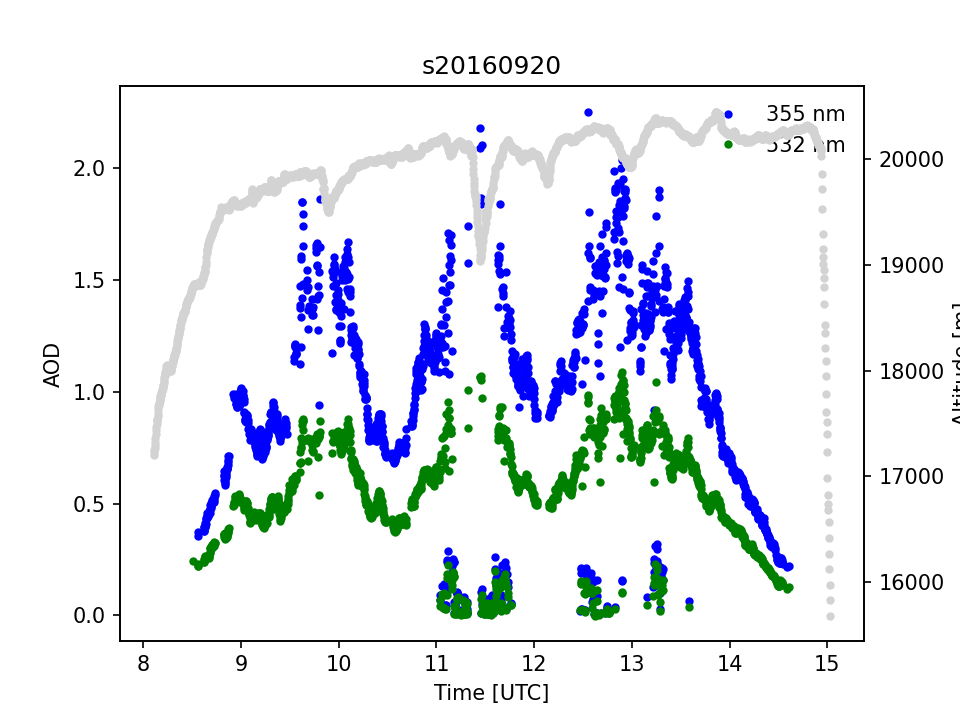

<IPython.core.display.Javascript object>


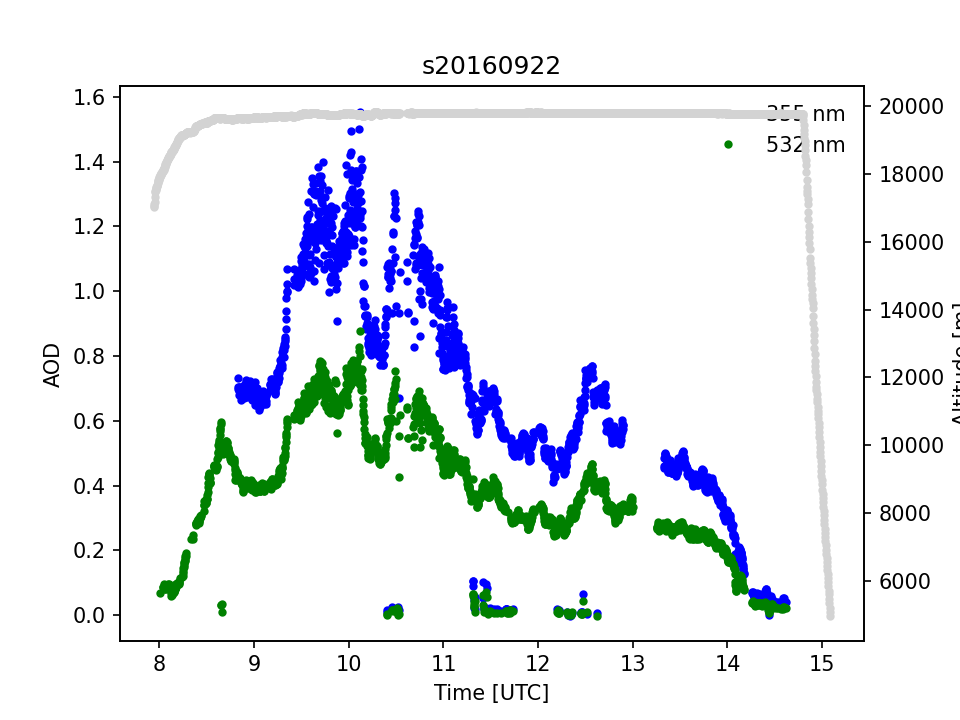

<IPython.core.display.Javascript object>


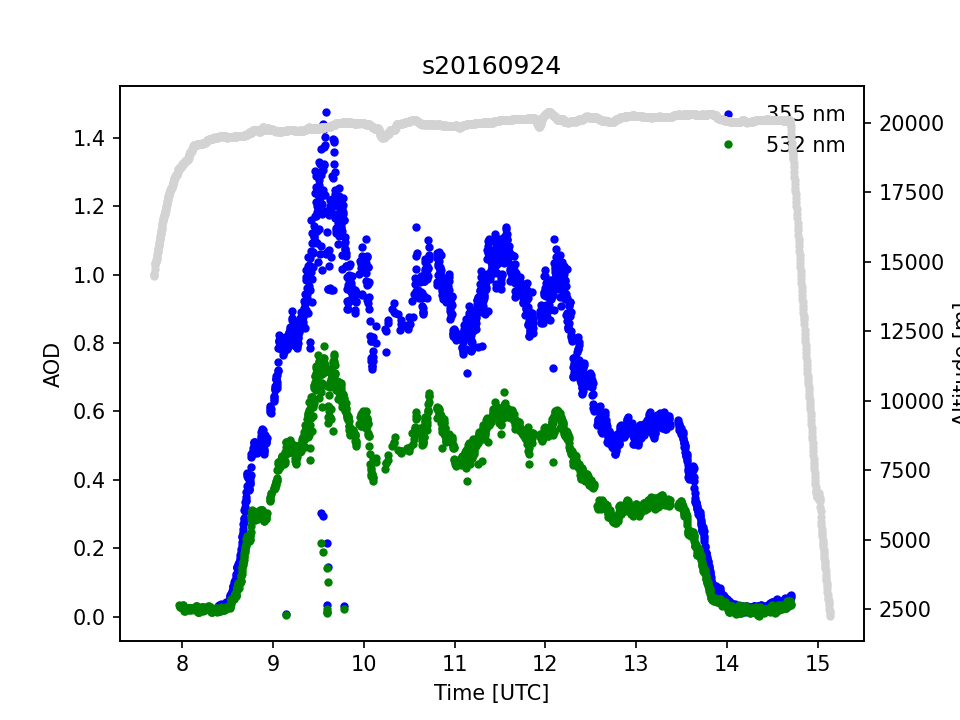

In [61]:
for sk in s6.keys():
    plt.figure()
    plt.plot(s6[sk]['time'],s6[sk]['acaod_355'],'b.',label='355 nm')
    plt.plot(s6[sk]['time'],s6[sk]['acaod_532'],'g.',label='532 nm')
    plt.title(sk)
    plt.legend(frameon=False,numpoints=1)
    plt.ylabel('AOD')
    plt.xlabel('Time [UTC]')
    ax = plt.gca()
    axy = ax.twinx()
    axy.plot(s6[sk]['time'],s6[sk]['alt'],'.',color='lightgrey')
    axy.set_ylabel('Altitude [m]')

<IPython.core.display.Javascript object>


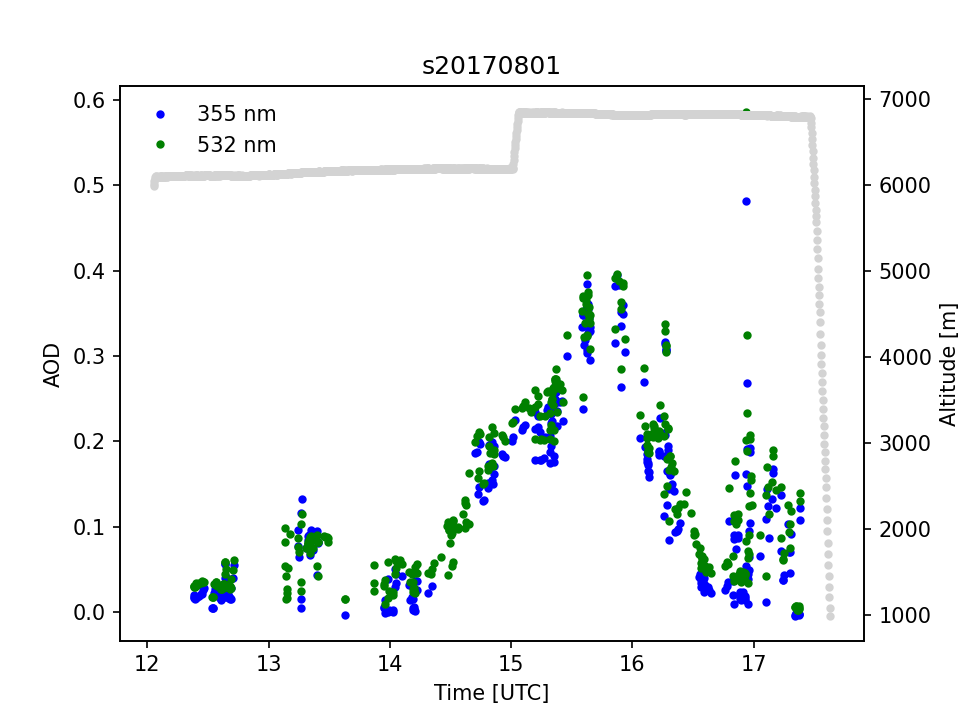

<IPython.core.display.Javascript object>


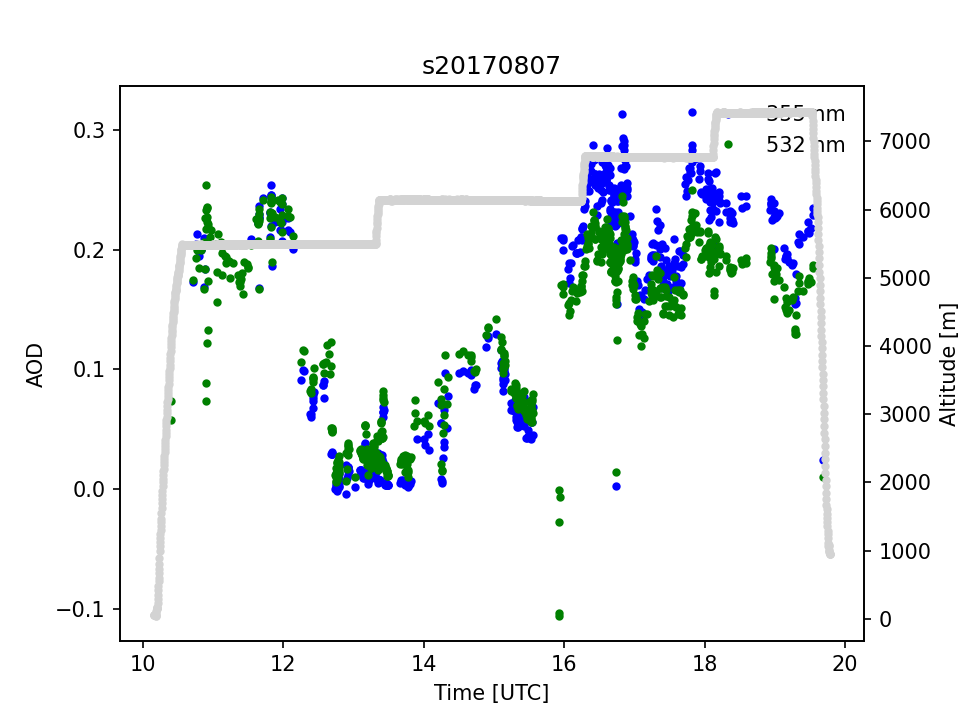

<IPython.core.display.Javascript object>


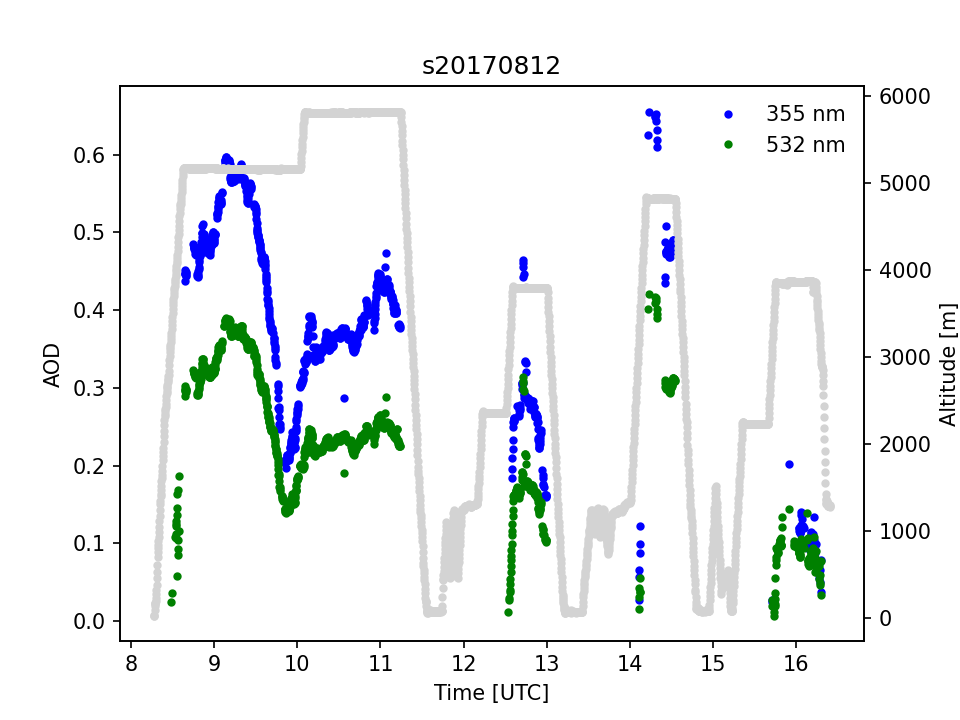

<IPython.core.display.Javascript object>


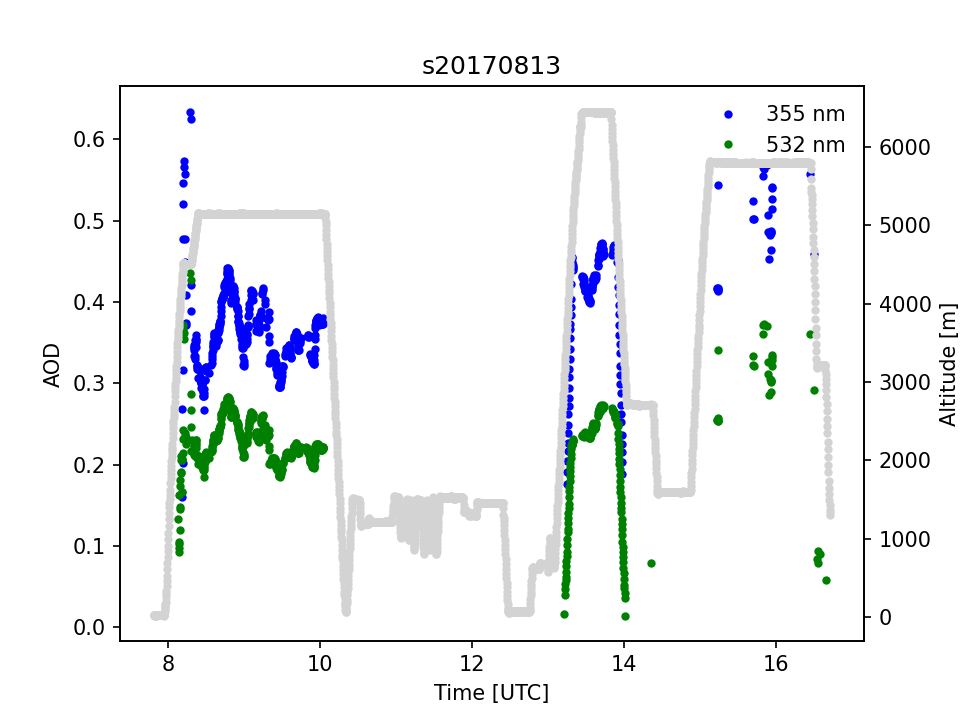

<IPython.core.display.Javascript object>


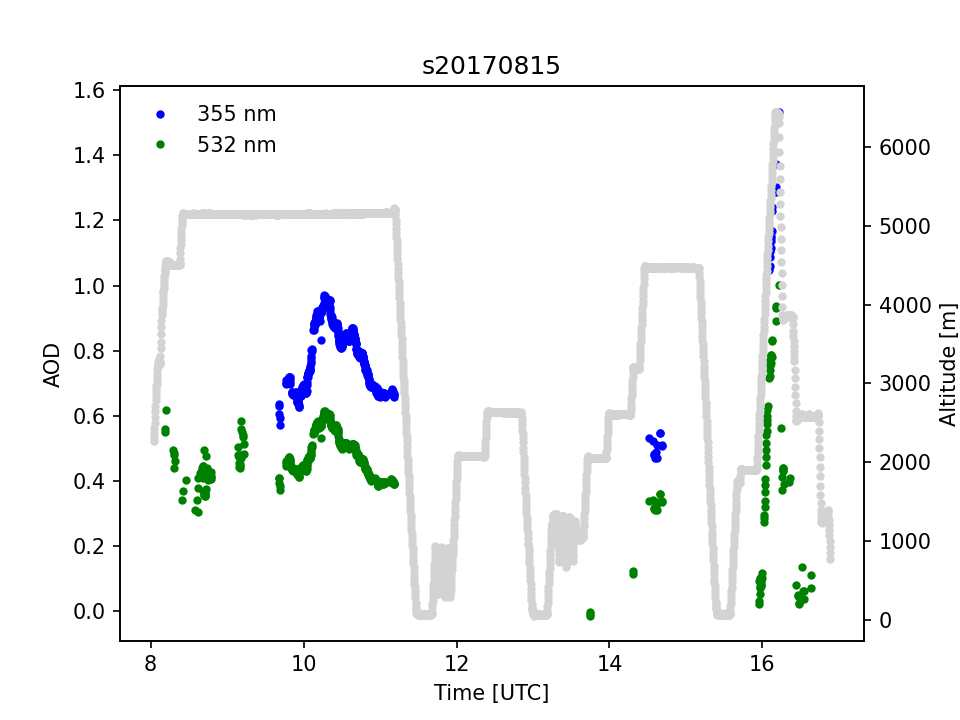

<IPython.core.display.Javascript object>


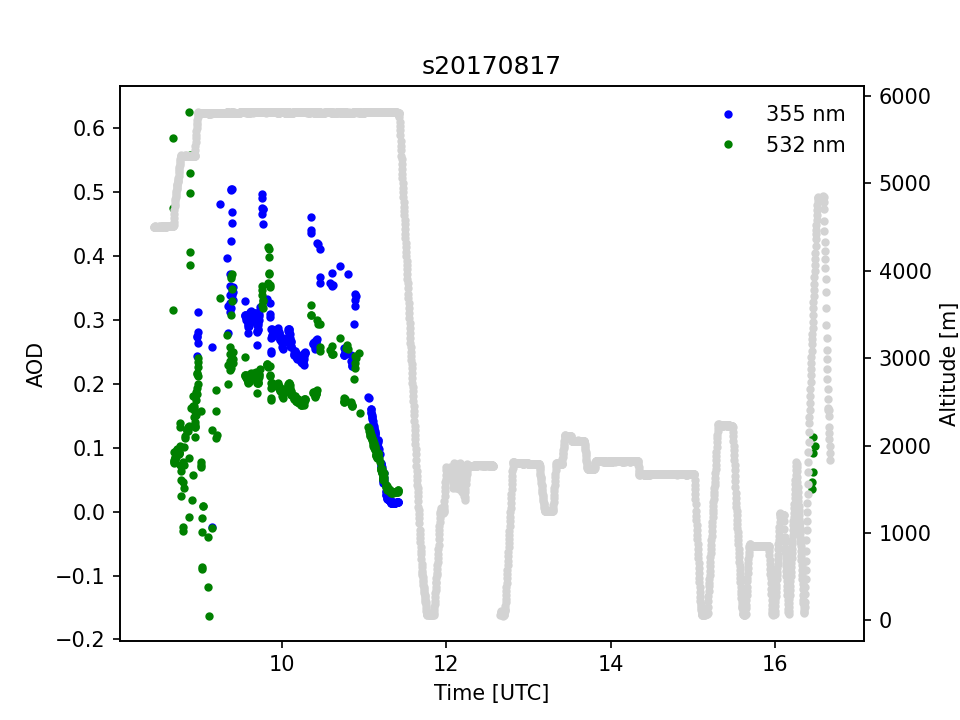

<IPython.core.display.Javascript object>


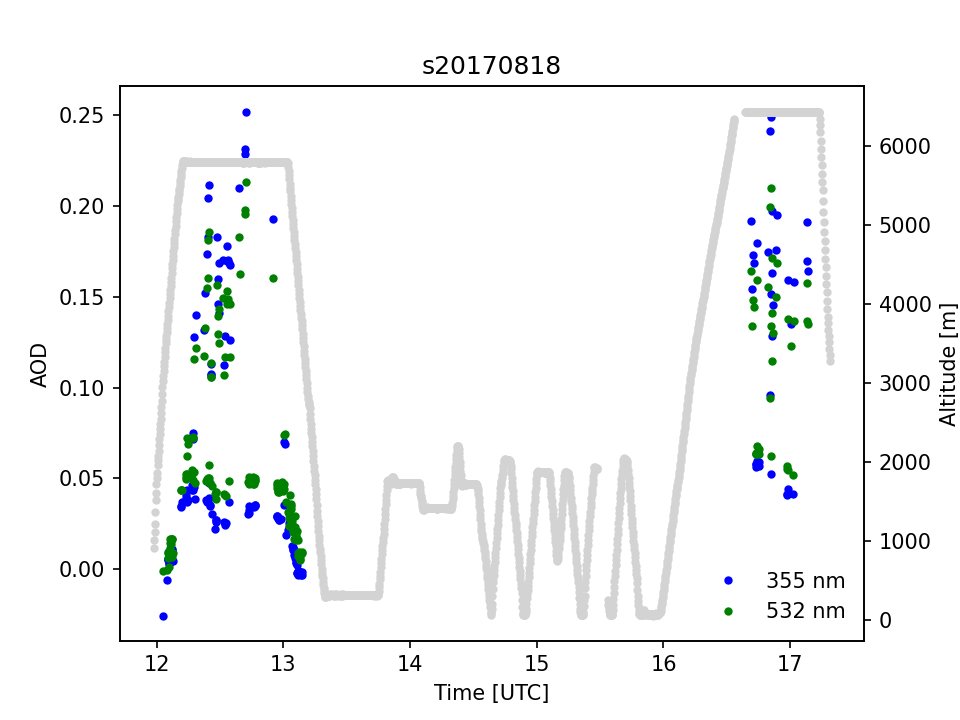

<IPython.core.display.Javascript object>


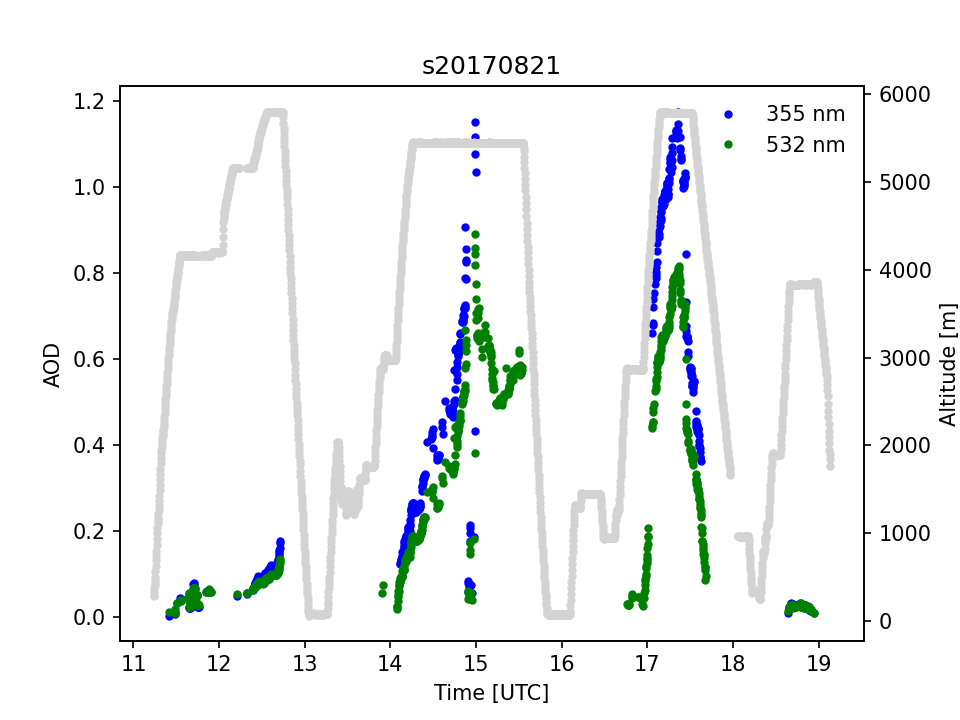

<IPython.core.display.Javascript object>


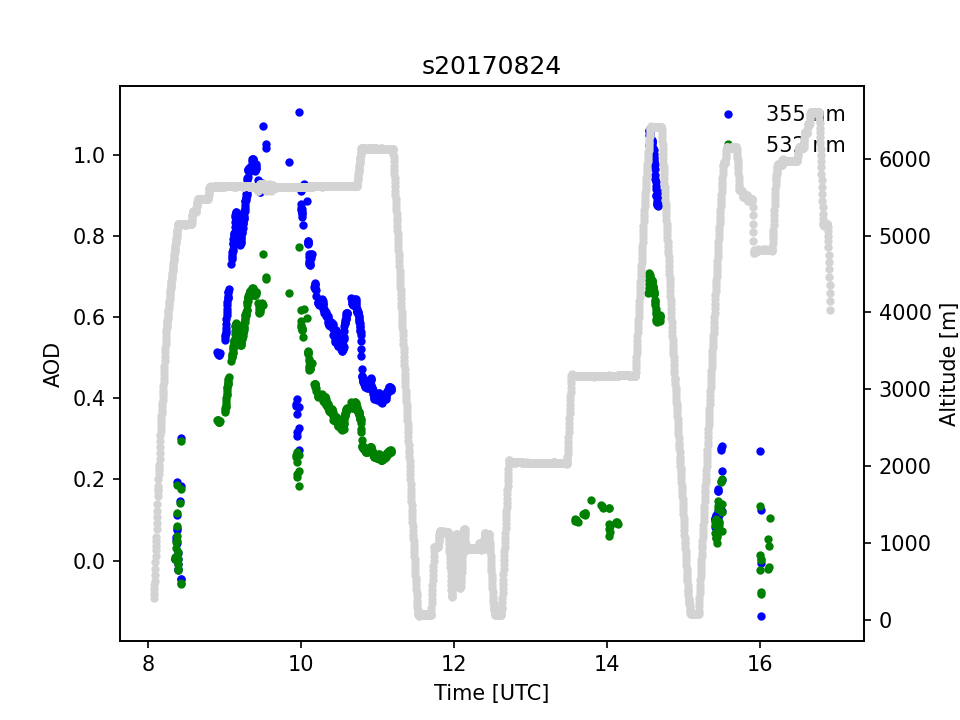

<IPython.core.display.Javascript object>


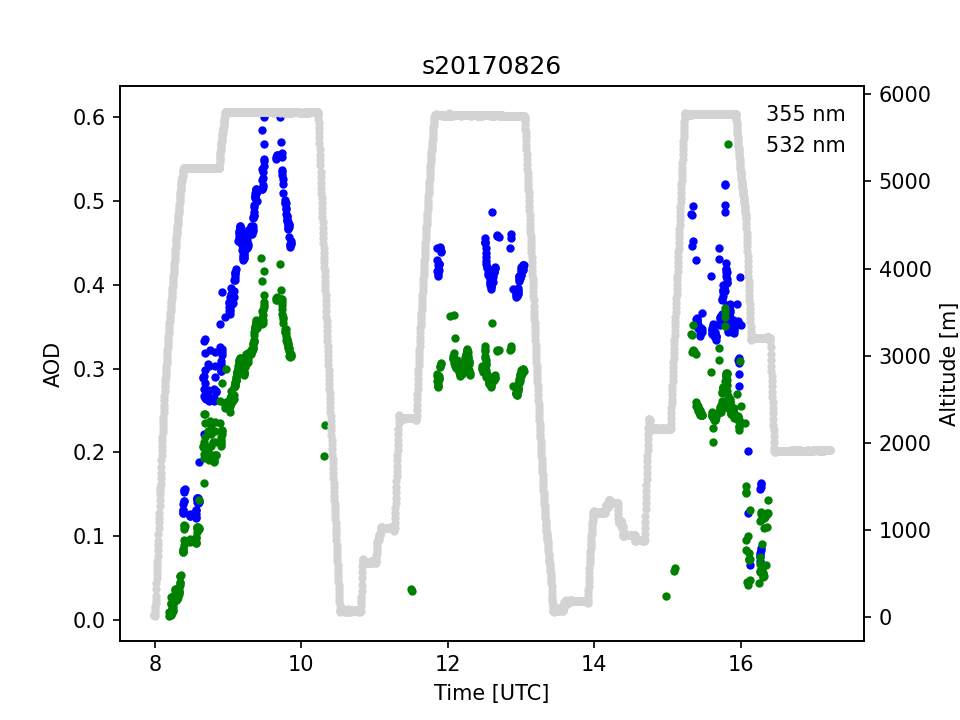

<IPython.core.display.Javascript object>


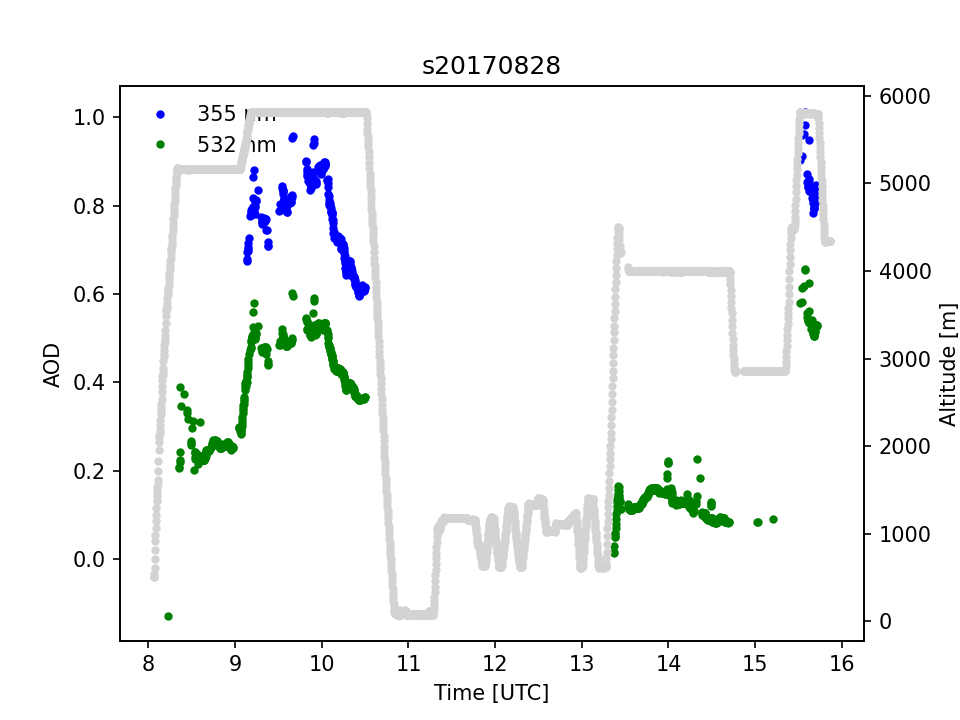

/tmp/ipykernel_1584044/2202628625.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


<IPython.core.display.Javascript object>


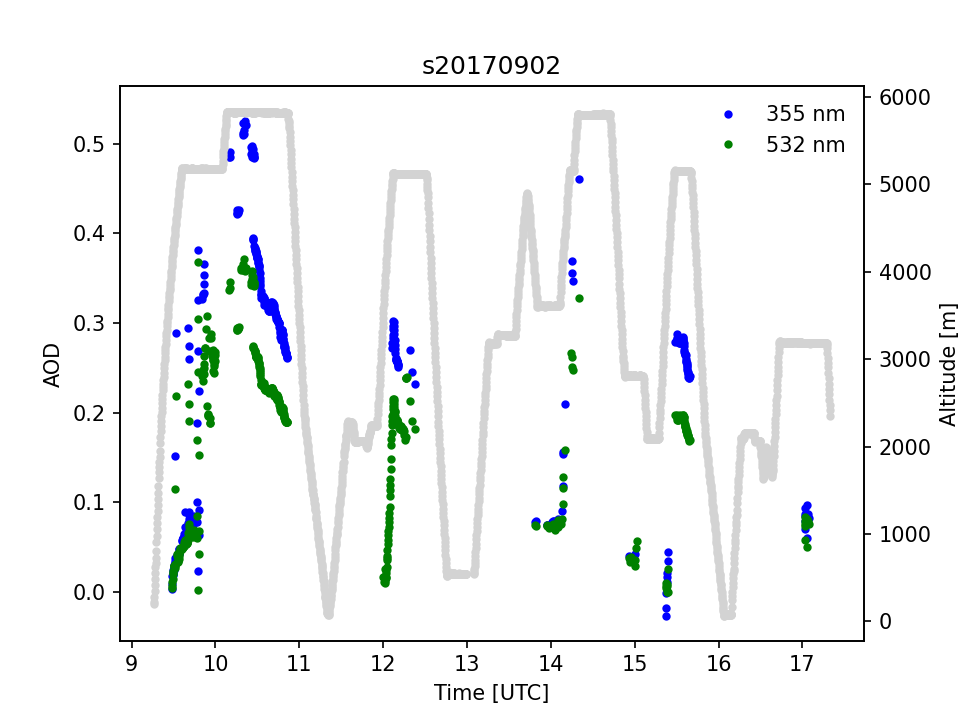

<IPython.core.display.Javascript object>


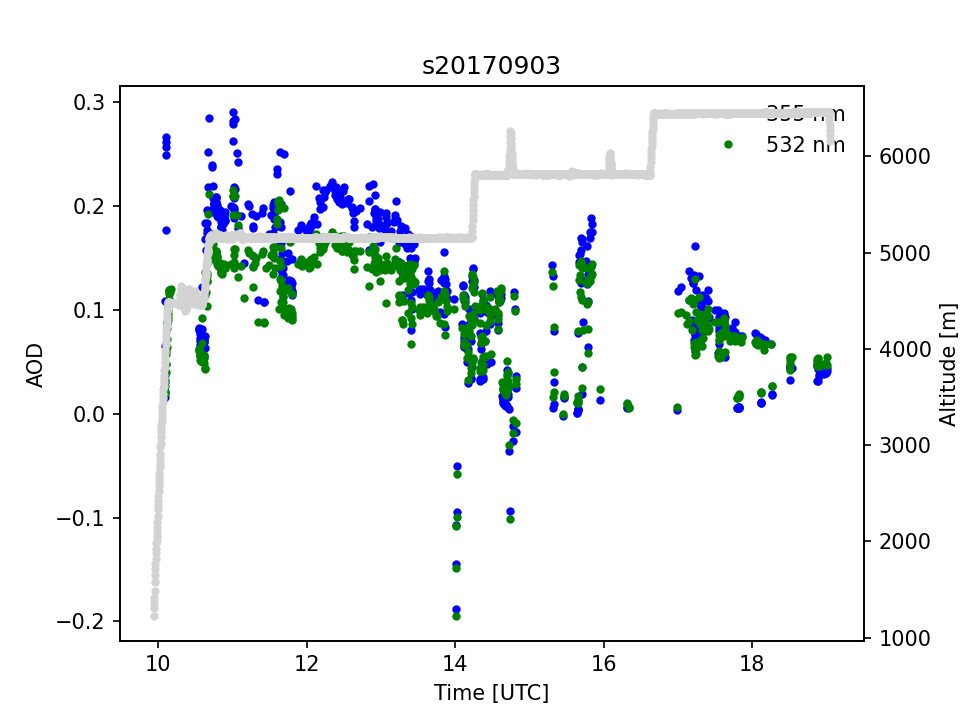

<IPython.core.display.Javascript object>


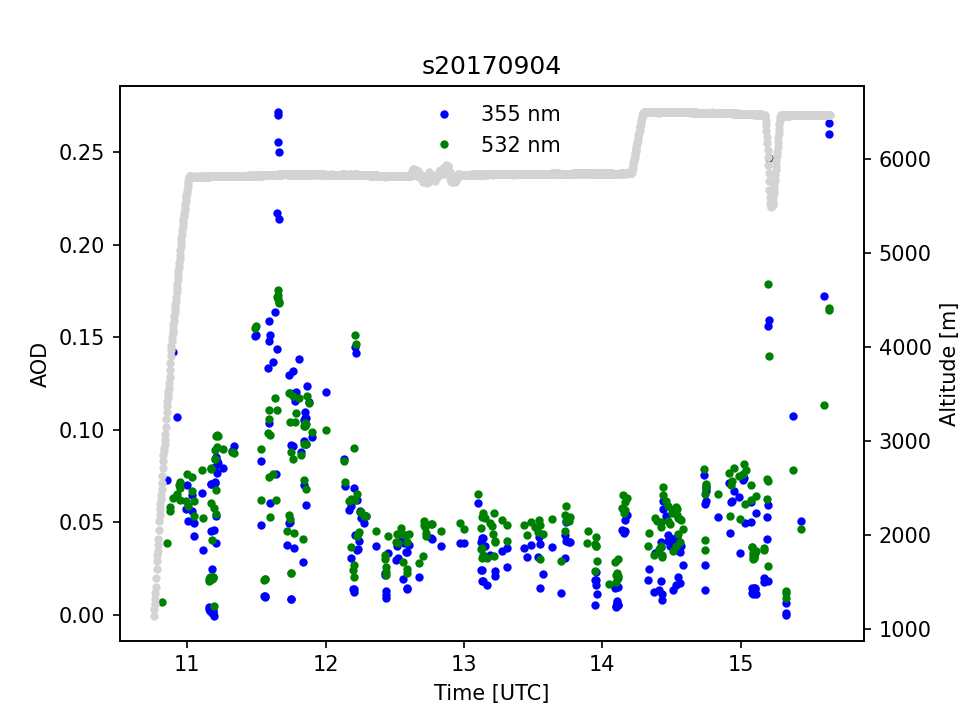

In [81]:
for sk in s7.keys():
    plt.figure()
    plt.plot(s7[sk]['time'],s7[sk]['acaod_355'],'b.',label='355 nm')
    plt.plot(s7[sk]['time'],s7[sk]['acaod_532'],'g.',label='532 nm')
    plt.title(sk)
    plt.legend(frameon=False,numpoints=1)
    plt.ylabel('AOD')
    plt.xlabel('Time [UTC]')
    ax = plt.gca()
    axy = ax.twinx()
    axy.plot(s7[sk]['time'],s7[sk]['alt'],'.',color='lightgrey')
    axy.set_ylabel('Altitude [m]')

<IPython.core.display.Javascript object>


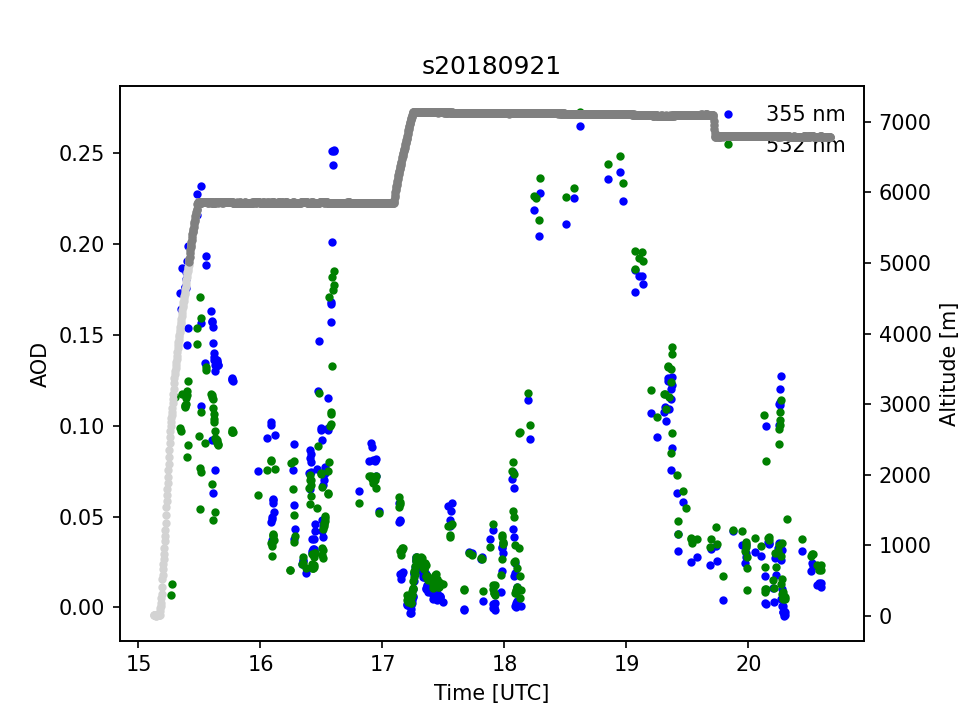

<IPython.core.display.Javascript object>


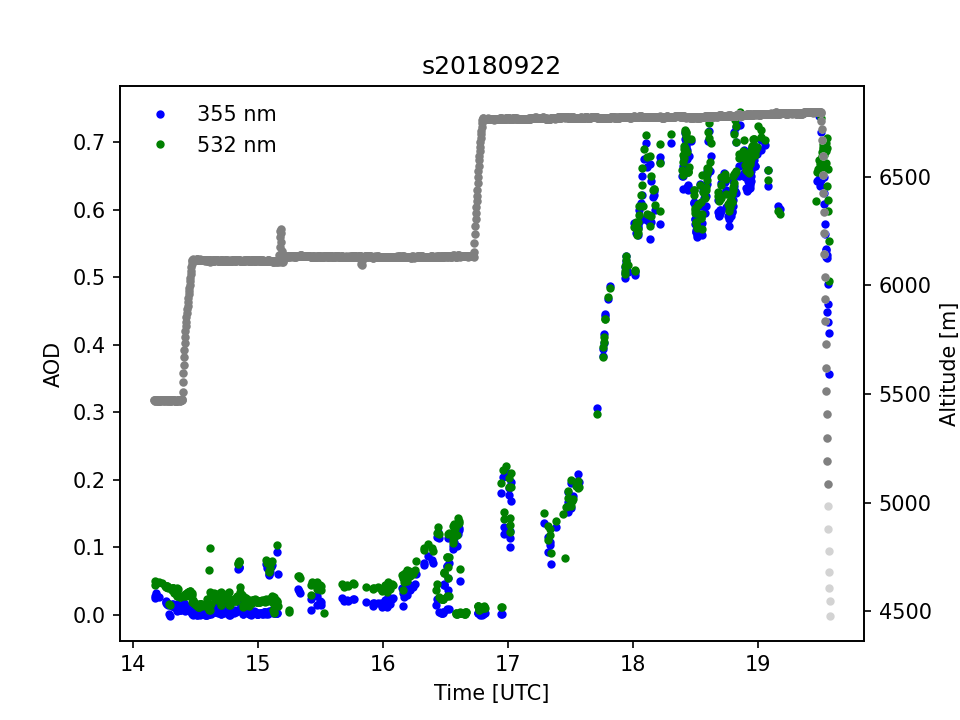

<IPython.core.display.Javascript object>


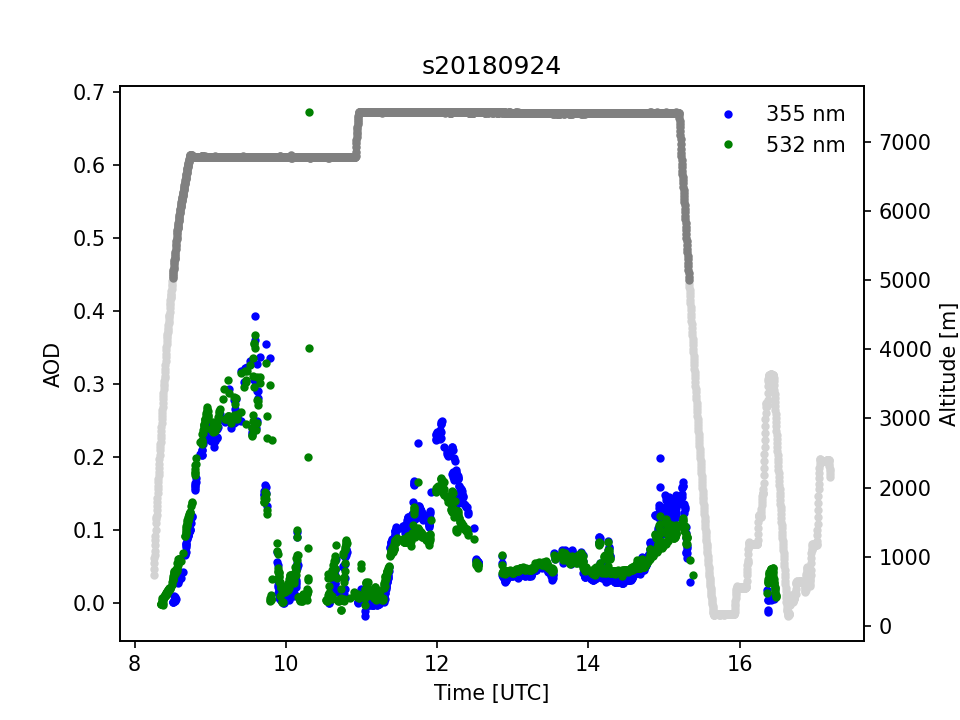

<IPython.core.display.Javascript object>


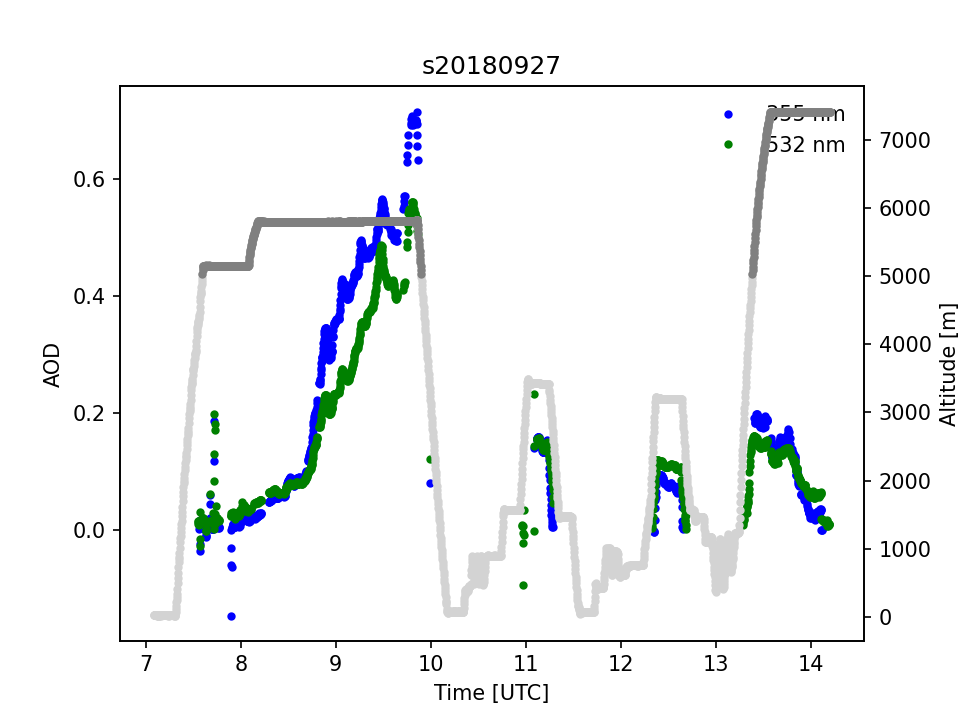

<IPython.core.display.Javascript object>


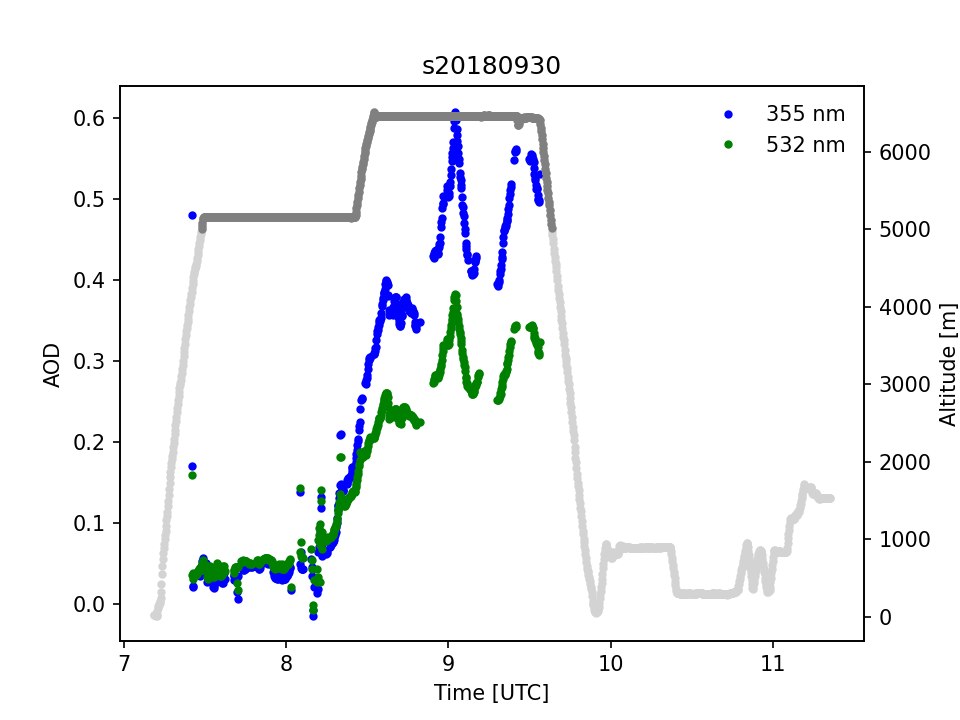

<IPython.core.display.Javascript object>


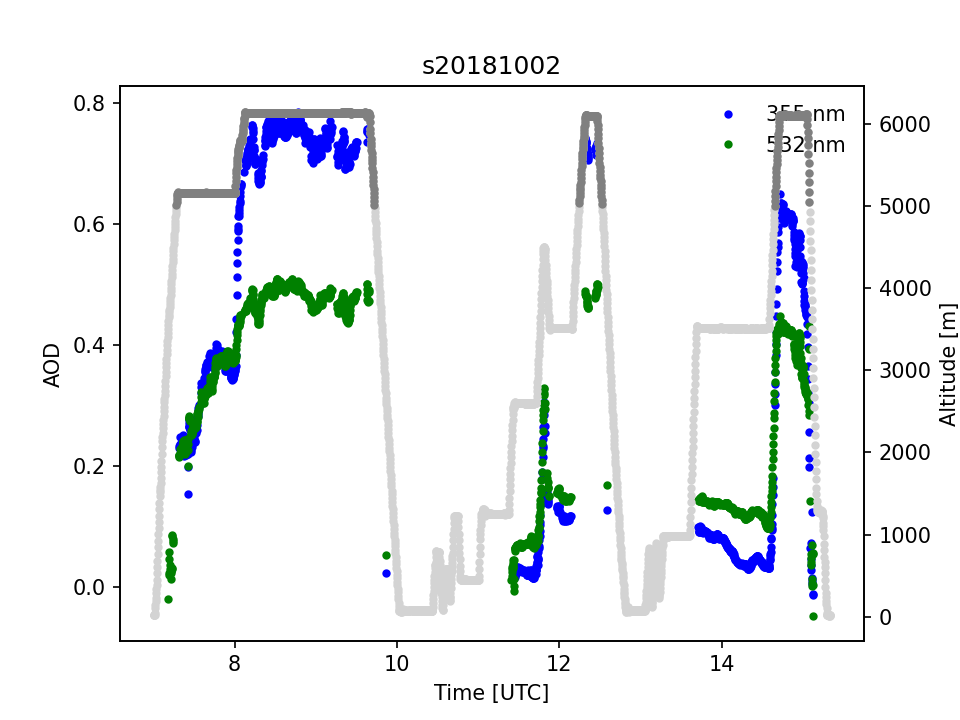

<IPython.core.display.Javascript object>


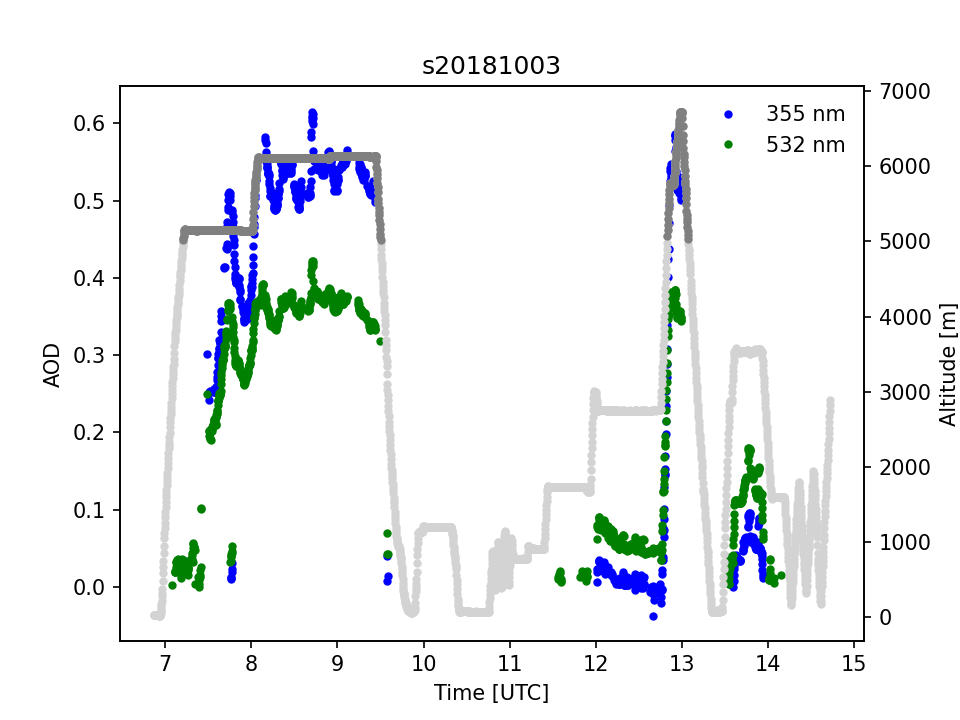

<IPython.core.display.Javascript object>


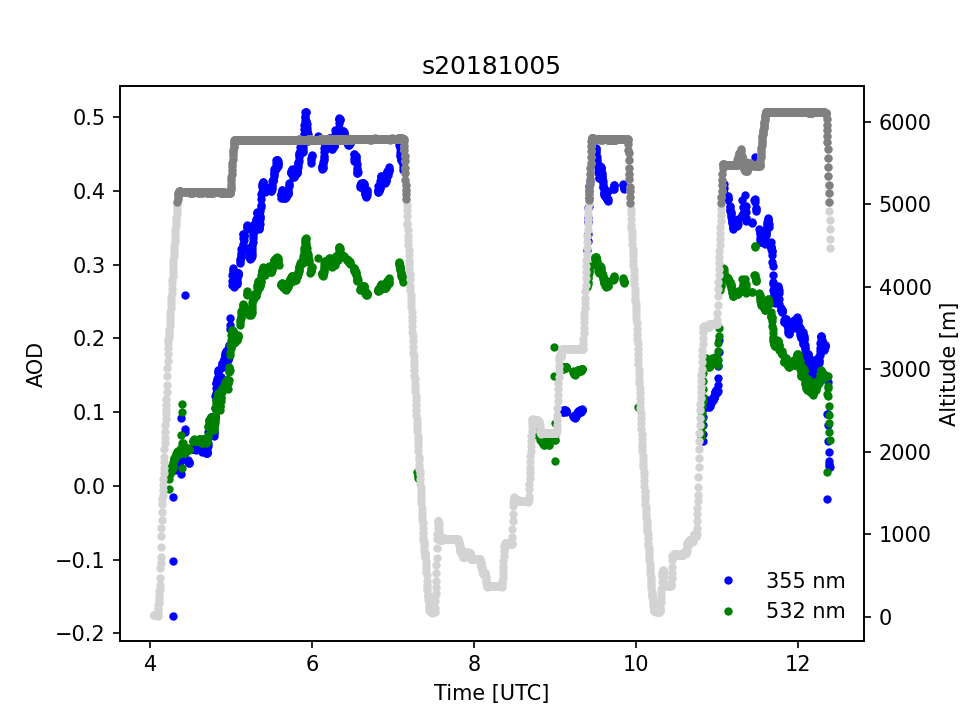

<IPython.core.display.Javascript object>


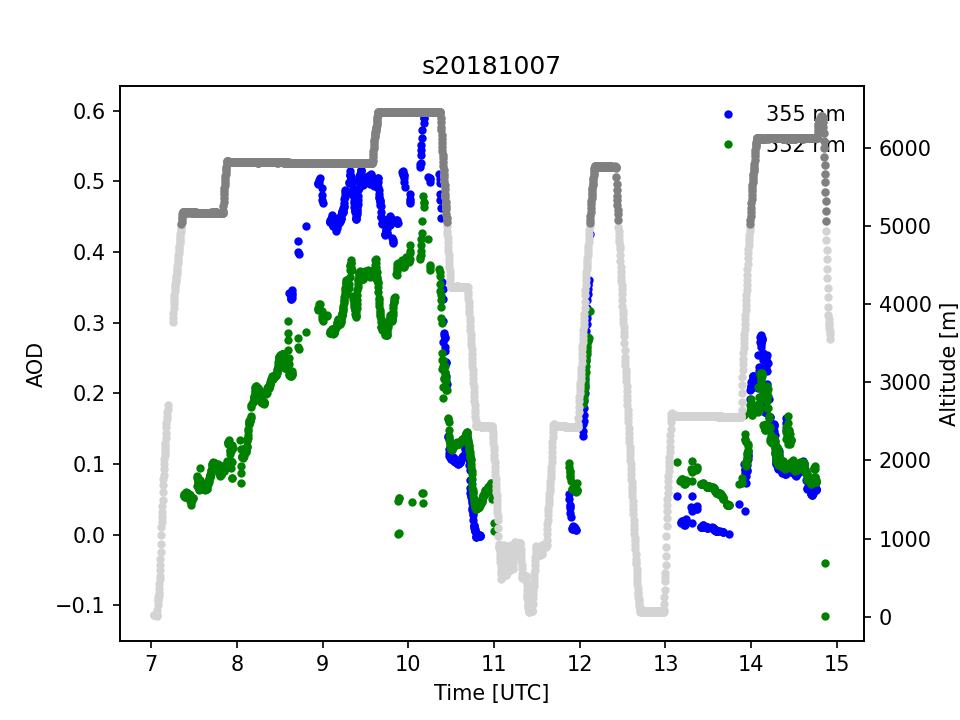

<IPython.core.display.Javascript object>


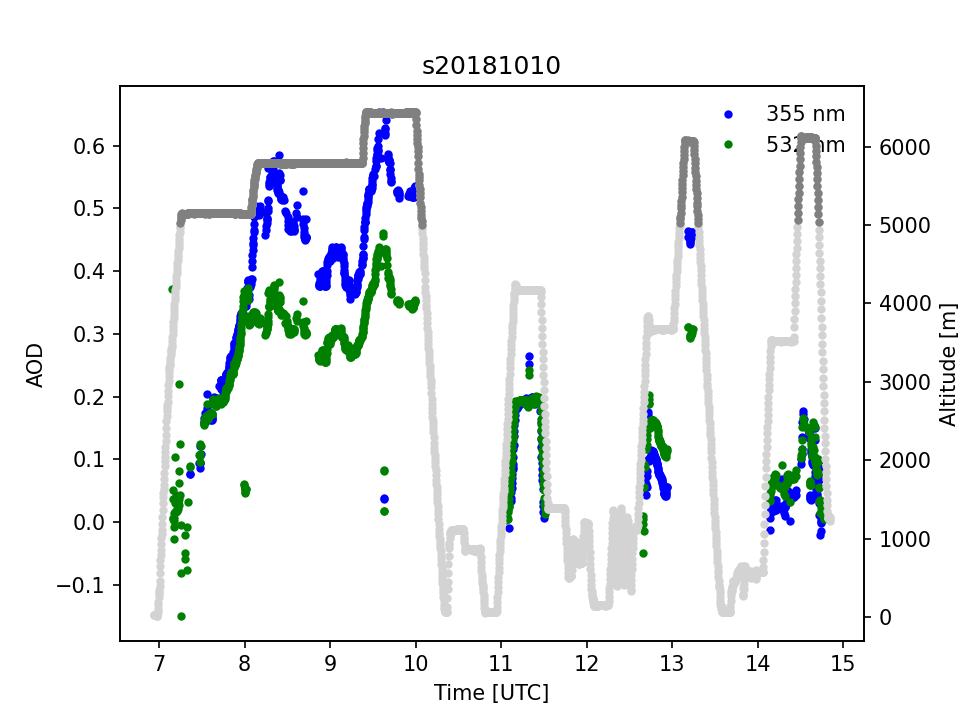

<IPython.core.display.Javascript object>


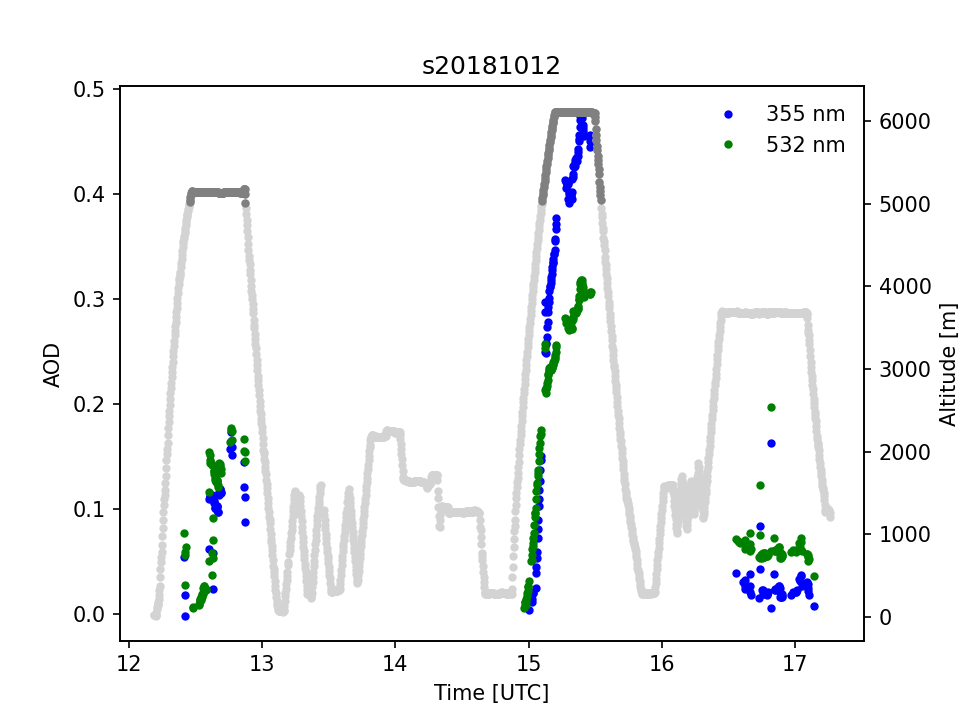

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


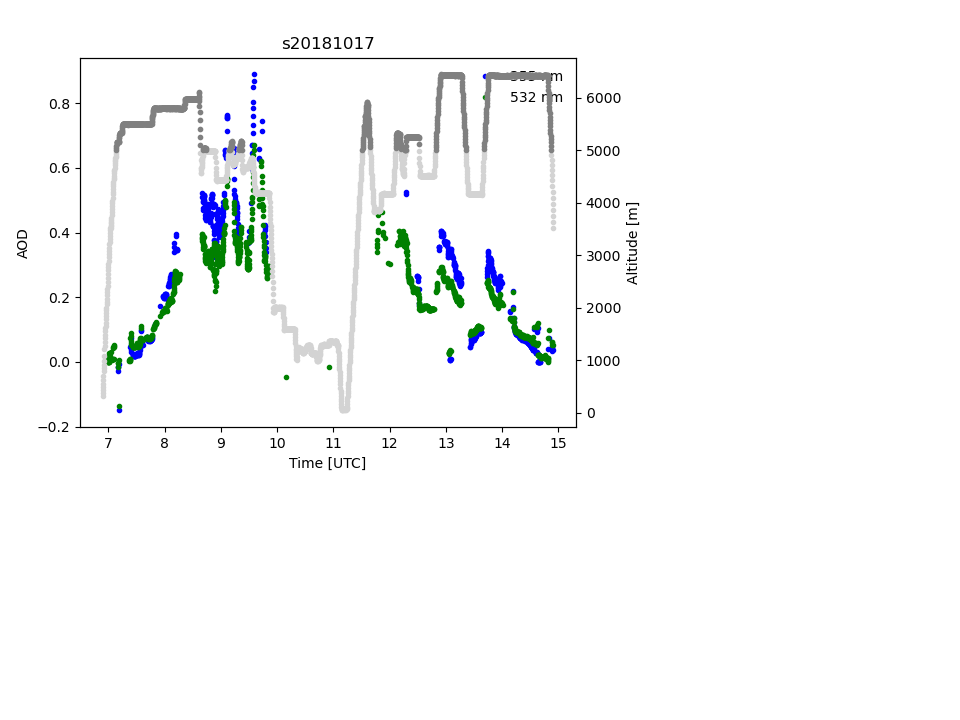

<IPython.core.display.Javascript object>


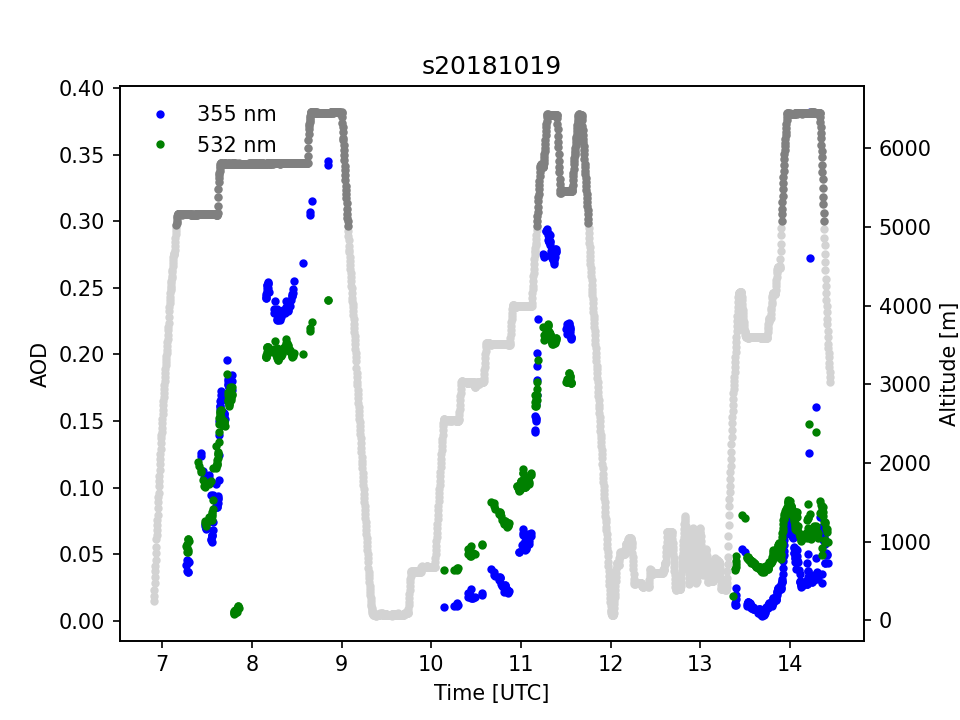

<IPython.core.display.Javascript object>


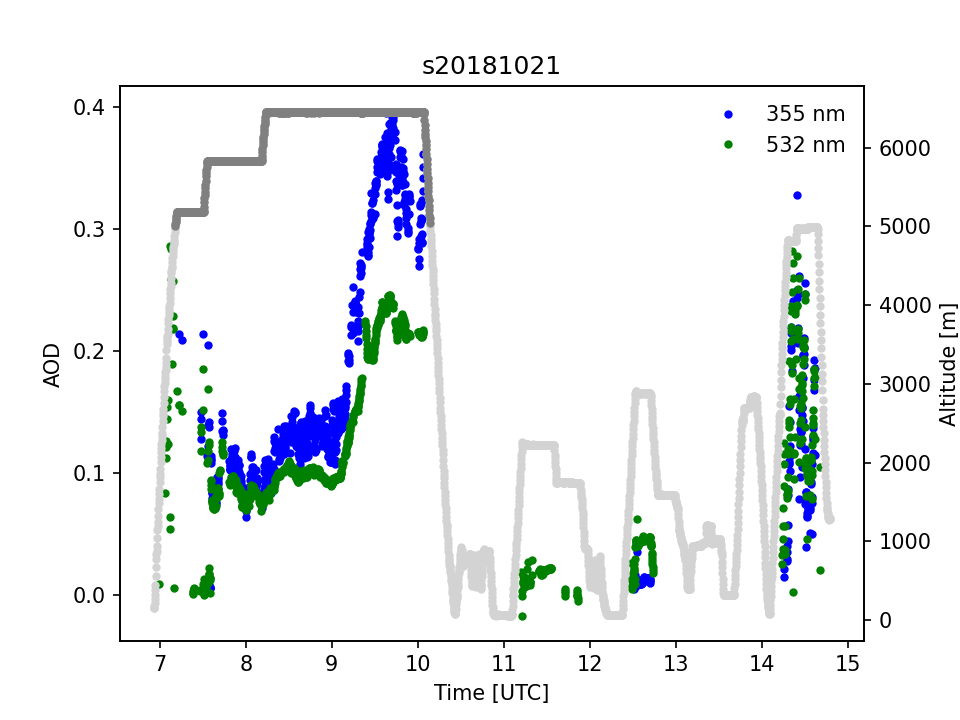

<IPython.core.display.Javascript object>


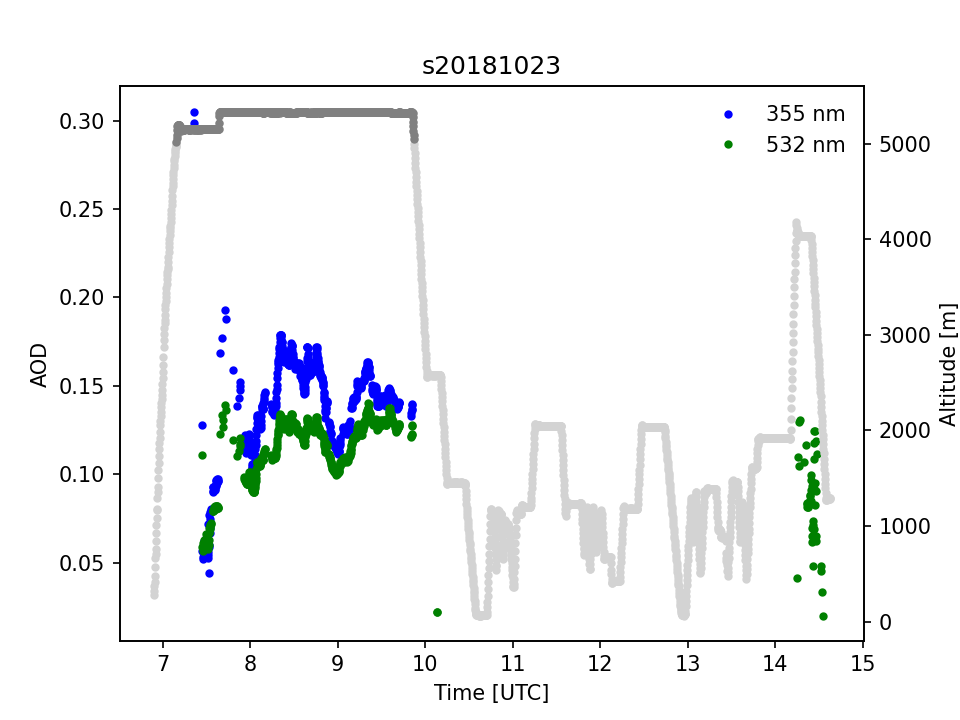

<IPython.core.display.Javascript object>


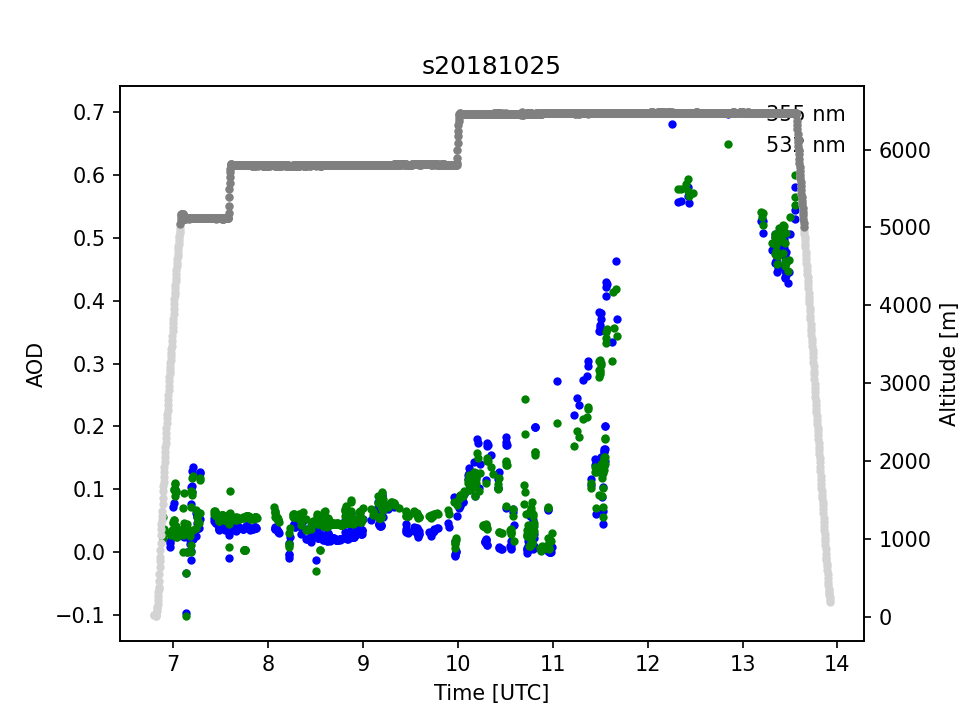

<IPython.core.display.Javascript object>


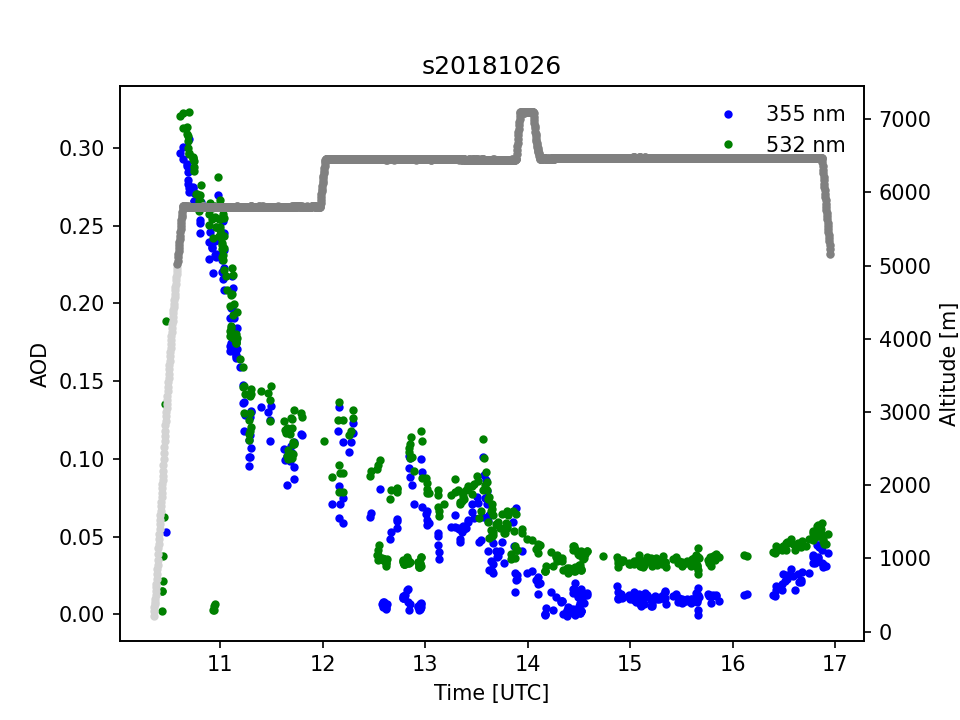

<IPython.core.display.Javascript object>


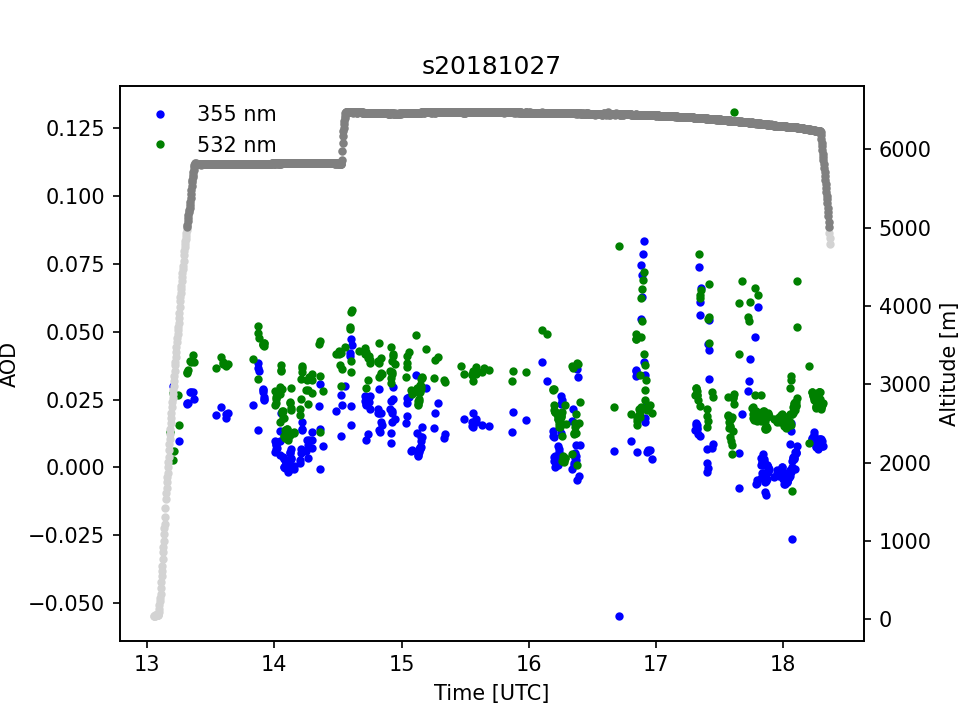

In [82]:
for sk in s8.keys():
    plt.figure()
    plt.plot(s8[sk]['time'],s8[sk]['acaod_355'],'b.',label='355 nm')
    plt.plot(s8[sk]['time'],s8[sk]['acaod_532'],'g.',label='532 nm')
    plt.title(sk)
    plt.legend(frameon=False,numpoints=1)
    plt.ylabel('AOD')
    plt.xlabel('Time [UTC]')
    ax = plt.gca()
    axy = ax.twinx()
    axy.plot(s8[sk]['time'],s8[sk]['alt'],'.',color='lightgrey')
    axy.plot(s8[sk]['time'][s8[sk]['fl']],s8[sk]['alt'][s8[sk]['fl']],'.',color='grey')
    axy.set_ylabel('Altitude [m]')